# Librairies et importations 

In [241]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install statsmodels
!pip install numpy
!pip install scikit-learn
!pip install pmdarima

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings

# 1. Récupération des datasets 

## A. Emissions GHG (CO2,CH4,N20,Fgases,GHG)

### Nous allons récupérer les données des fichiers csv en fonction du type de l'émission

Fichiers csv : 
- "CO2-emissions-by-sector.csv"
- "CH4-emissions-by-sector.csv"
- "N2O-emissions-by-sector.csv"
- "Fgases-emissions-by-sector.csv"
- "GHG-emissions-by-sector.csv"

Présentation des différents secteurs : 

-Agriculture : Les émissions associées aux activités agricoles. Cela peut inclure les émissions provenant de la gestion des sols, de l'utilisation d'engrais, de la fermentation entérique chez les animaux d'élevage, etc.

-Buildings : Les émissions provenant du secteur des bâtiments, généralement liées à la consommation d'énergie pour le chauffage, la climatisation, l'éclairage et d'autres besoins énergétiques dans les bâtiments résidentiels et commerciaux.

Fuel Exploitation : Les émissions résultant de l'exploitation des combustibles fossiles, y compris l'extraction, la production et le traitement du pétrole, du gaz et du charbon.

Industrial Combustion : Les émissions résultant de la combustion de combustibles fossiles dans le secteur industriel pour la production de chaleur et d'énergie nécessaire aux processus industriels.

Power Industry : Les émissions de CO2 provenant du secteur de la production d'électricité, générées par la combustion de combustibles fossiles dans les centrales.

Processes: Les émissions provenant de divers processus industriels autres que la combustion, tels que la fabrication de ciment, la production chimique, etc. Ce sont des exemples, il en existe plein d'autres.

Transport: Les émissions générées par le secteur des transports, comprenant les émissions provenant des véhicules routiers, du transport maritime, aérien et ferroviaire, ainsi que d'autres moyens de transport.

Waste : Les émissions provenant de la gestion des déchets, y compris la décomposition des déchets organiques dans les décharges et les émissions associées à d'autres processus de traitement des déchets.

Total /cap : Les émissions totales par habitant, une mesure qui prend en compte l'ensemble des émissions d'un pays ou d'une région divisées par la population.

In [152]:
data_CO2 = pd.read_csv("CO2-emissions-by-sector.csv")
data_CH4 = pd.read_csv("CH4-emissions-by-sector.csv")
data_N2O = pd.read_csv("N2O-emissions-by-sector.csv")
data_Fgases = pd.read_csv("Fgases-emissions-by-sector.csv")
data_GHG = pd.read_csv("GHG-emissions-by-sector.csv")

On utilise la fonction .rename() de pandas pour renommer la colonne Category en Year de chaque dataframe

In [153]:
data_CO2 = data_CO2.rename(columns={'Category':'Year'})
data_CH4 = data_CH4.rename(columns={'Category':'Year'})
data_N2O = data_N2O.rename(columns={'Category':'Year'})
data_Fgases = data_Fgases.rename(columns={'Category':'Year'})
data_GHG = data_GHG.rename(columns={'Category':'Year'})

Pour pouvoir merger les dataframe en fonction de la colonne 'Year', nous allons appliquer un sufixe à chaque colonne des dataframe en fonction du type de gaz à effet de serre émis.

In [154]:
data_CO2 = data_CO2.rename(columns=lambda col: col + '-CO2' if col != 'Year' else col)
data_CO2.head()

,Year,Agriculture-CO2,Buildings-CO2,Fuel Exploitation-CO2,Industrial Combustion-CO2,Power Industry-CO2,Processes-CO2,Transport-CO2,Waste-CO2,Total CO2/cap-CO2
0,1970,49143283,2926458212,1562255701,3744304794,3823699383,915670265,2796286627,7605313,4.28
1,1971,49143283,2939568254,1574399637,3511720997,3910981426,921879024,2876504749,7779282,4.18
2,1972,49143283,3056870832,1654467714,3602041957,4189105946,990161466,3045881595,7957965,4.31
3,1973,49143283,3120449101,1828873474,3788025165,4524711259,1030394452,3221973378,8139190,4.47
4,1974,49900345,3040634678,1824605510,3774962595,4603893544,1007746632,3191503489,8320052,4.37


In [155]:
data_CH4 = data_CH4.rename(columns=lambda col: col + '-CH4' if col != 'Year' else col)
data_CH4.head()

,Year,Agriculture-CH4,Buildings-CH4,Fuel Exploitation-CH4,Industrial Combustion-CH4,Power Industry-CH4,Processes-CH4,Transport-CH4,Waste-CH4,Total CH4/cap-CH4
0,1970,3586083162,295562667,2015354707,8580075,1413346,5608009,20344155,1131046316,1.91
1,1971,3647808963,289022899,1991620043,8033084,1450008,5215240,21194747,1188468475,1.89
2,1972,3661879529,291379692,2049742730,8295522,1592332,5756597,22721891,1212408830,1.88
3,1973,3710214427,292896695,2152361604,8588179,1720306,5789461,24199328,1236369926,1.89
4,1974,3763011833,294922505,2121892209,8731193,1803342,5222439,24055041,1255712248,1.87


In [156]:
data_N2O = data_N2O.rename(columns=lambda col: col + '-N2O' if col != 'Year' else col)
data_N2O.head()

,Year,Agriculture-N2O,Buildings-N2O,Fuel Exploitation-N2O,Industrial Combustion-N2O,Power Industry-N2O,Processes-N2O,Transport-N2O,Waste-N2O,Total N2O/cap-N2O
0,1970,891798134,45729181,2973358,12397988,11100270,412890715,34180071,43723239,0.393
1,1971,906794545,45760854,3117505,11584259,11240278,418058877,34791768,44416307,0.391
2,1972,916548531,47350366,3307259,11871221,11853623,429106436,37095585,45069140,0.390
3,1973,928346527,49454995,3716503,12287900,12610785,456801389,39282634,46143266,0.394
4,1974,936495179,49995812,3771094,12354813,12751199,471303599,39576460,46973226,0.393


In [157]:
data_Fgases = data_Fgases.rename(columns=lambda col: col + '-Fgases' if col != 'Year' else col)
data_Fgases.head()

,Year,Processes-Fgases,Total F\x2Dgases/cap-Fgases
0,1970,153335449,0.041
1,1971,162366412,0.043
2,1972,169844001,0.044
3,1973,181366111,0.046
4,1974,192245086,0.048


In [158]:
data_GHG = data_GHG.rename(columns=lambda col: col + '-GHG' if col != 'Year' else col)
data_GHG.head()

,Year,Agriculture-GHG,Buildings-GHG,Fuel Exploitation-GHG,Industrial Combustion-GHG,Power Industry-GHG,Processes-GHG,Transport-GHG,Waste-GHG,Total GHG/cap-GHG
0,1970,4527024579,3267750060,3580583766,3765282857,3836212999,1487504437,2850810853,1182374868,6.62
1,1971,4603746791,3274352007,3569137184,3531338339,3923671713,1507519552,2932491264,1240664064,6.51
2,1972,4627571342,3395600889,3707517703,3622208700,4202551901,1594868499,3105699071,1265435934,6.63
3,1973,4687704237,3462800791,3984951580,3808901244,4539042350,1674351414,3285455339,1290652382,6.81
4,1974,4749407357,3385552994,3950268813,3796048601,4618448085,1676517755,3255134990,1311005526,6.68


### Nous allons mergé les dataframes en fonction de la colonne 'Year'.
Dataset pour les emissions de gaz à effet de serre dans le monde :

In [159]:
data_GHG_merged = data_CO2.merge(data_CH4, on='Year').merge(data_N2O, on='Year').merge(data_Fgases, on='Year').merge(data_GHG, on='Year')
data_GHG_merged.head()

,Year,Agriculture-CO2,Buildings-CO2,Fuel Exploitation-CO2,Industrial Combustion-CO2,Power Industry-CO2,Processes-CO2,Transport-CO2,Waste-CO2,Total CO2/cap-CO2,...,Total F\x2Dgases/cap-Fgases,Agriculture-GHG,Buildings-GHG,Fuel Exploitation-GHG,Industrial Combustion-GHG,Power Industry-GHG,Processes-GHG,Transport-GHG,Waste-GHG,Total GHG/cap-GHG
0,1970,49143283,2926458212,1562255701,3744304794,3823699383,915670265,2796286627,7605313,4.28,...,0.041,4527024579,3267750060,3580583766,3765282857,3836212999,1487504437,2850810853,1182374868,6.62
1,1971,49143283,2939568254,1574399637,3511720997,3910981426,921879024,2876504749,7779282,4.18,...,0.043,4603746791,3274352007,3569137184,3531338339,3923671713,1507519552,2932491264,1240664064,6.51
2,1972,49143283,3056870832,1654467714,3602041957,4189105946,990161466,3045881595,7957965,4.31,...,0.044,4627571342,3395600889,3707517703,3622208700,4202551901,1594868499,3105699071,1265435934,6.63
3,1973,49143283,3120449101,1828873474,3788025165,4524711259,1030394452,3221973378,8139190,4.47,...,0.046,4687704237,3462800791,3984951580,3808901244,4539042350,1674351414,3285455339,1290652382,6.81
4,1974,49900345,3040634678,1824605510,3774962595,4603893544,1007746632,3191503489,8320052,4.37,...,0.048,4749407357,3385552994,3950268813,3796048601,4618448085,1676517755,3255134990,1311005526,6.68


## B. Températures globales, terrestres et maritimes

### Nous allons récupérer les valeurs des anomalies de température globales, terrestres et maritimes.

Fichiers csv  :

    - "data_land_temperatures.csv"
    - "data_ocean_temperatures.csv"
    - "global_land_ocean_temperatures.csv"

Les données ont été récupérées sur le site National Centers for Environmental Information : https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/all/8/1850-2023. On remarque que les données de températures globales ne sont pas la moyenne des températures terrestres et maritimes par année. Il semblerait qu'il y ait des facteurs qui entrent en jeu dedans. Pour éviter toute incohérence nous avons choisi d'utiliser les données récupérées.

##### 1. Températures terrestres

In [161]:
data_land_temperatures = pd.read_csv("data_land_temperatures.csv", skiprows=4)
data_land_temperatures

,Year,Anomaly
0,185001,-0.95
1,185002,-0.25
2,185003,-0.47
3,185004,-0.43
4,185005,-0.45
...,...,...
2080,202305,1.19
2081,202306,1.37
2082,202307,1.41
2083,202308,1.66


In [162]:
data_land_temperatures['Year'] = data_land_temperatures['Year'].astype(str)
data_land_temperatures['Month'] = data_land_temperatures['Year'].str.slice(start = -2).astype(int)
data_land_temperatures['Year'] = data_land_temperatures['Year'].str.slice(stop=-2).astype(int)

data_land_temperatures = data_land_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_land_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [163]:
data_land_temperatures

,Year,Month,Anomaly
0,1850,1,-0.95
1,1850,2,-0.25
2,1850,3,-0.47
3,1850,4,-0.43
4,1850,5,-0.45
...,...,...,...
2080,2023,5,1.19
2081,2023,6,1.37
2082,2023,7,1.41
2083,2023,8,1.66


In [164]:
data_land_temperatures['Month'] = data_land_temperatures['Month'].replace({})

In [165]:
data_land_mean_temperatures = data_land_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_land_mean_temperatures = data_land_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_land_mean_temperatures

,Year,averageAnomaly
0,1850,-0.373333
1,1851,-0.246667
2,1852,-0.343333
3,1853,-0.336667
4,1854,-0.265833
...,...,...
169,2019,1.508333
170,2020,1.647500
171,2021,1.371667
172,2022,1.430000


<Axes: xlabel='Year'>

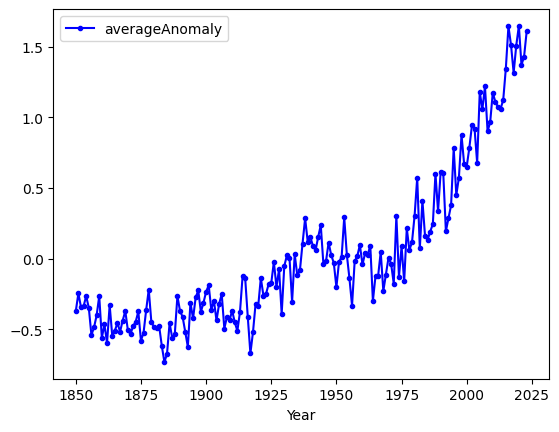

In [166]:
data_land_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

##### 2. Températures maritimes. 

Ce sont les températures mesurées au niveau des océans.

In [167]:
data_ocean_temperatures = pd.read_csv("data_ocean_temperatures.csv", skiprows=4)
data_ocean_temperatures

,Year,Anomaly
0,185001,-0.10
1,185002,-0.07
2,185003,-0.12
3,185004,-0.08
4,185005,-0.07
...,...,...
2080,202305,0.84
2081,202306,0.92
2082,202307,1.00
2083,202308,1.03


In [168]:
data_ocean_temperatures['Year'] = data_ocean_temperatures['Year'].astype(str)
data_ocean_temperatures['Month'] = data_ocean_temperatures['Year'].str.slice(start = -2).astype(int)
data_ocean_temperatures['Year'] = data_ocean_temperatures['Year'].str.slice(stop=-2).astype(int)

data_ocean_temperatures = data_ocean_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_ocean_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [169]:
data_ocean_mean_temperatures = data_ocean_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_ocean_mean_temperatures = data_ocean_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_ocean_mean_temperatures

,Year,averageAnomaly
0,1850,-0.058333
1,1851,0.003333
2,1852,0.027500
3,1853,0.009167
4,1854,-0.016667
...,...,...
169,2019,0.738333
170,2020,0.725000
171,2021,0.630833
172,2022,0.669167


<Axes: xlabel='Year'>

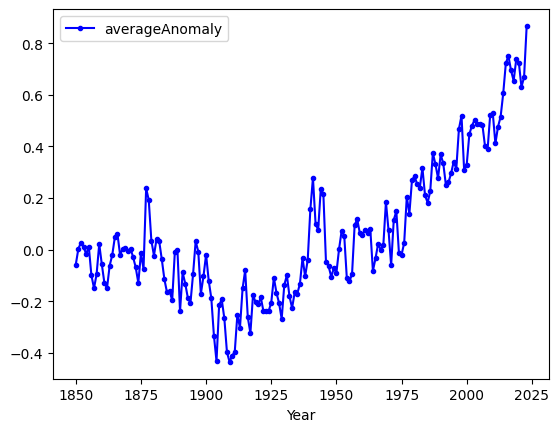

In [170]:
data_ocean_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

##### 3. Températures globales

In [171]:
data_global_temperatures = pd.read_csv("global_land_ocean_temperatures.csv", skiprows=4)
data_global_temperatures

,Year,Anomaly
0,185001,-0.37
1,185002,-0.12
2,185003,-0.23
3,185004,-0.19
4,185005,-0.19
...,...,...
2080,202305,0.95
2081,202306,1.06
2082,202307,1.13
2083,202308,1.22


In [172]:
data_global_temperatures['Year'] = data_global_temperatures['Year'].astype(str)
data_global_temperatures['Month'] = data_global_temperatures['Year'].str.slice(start = -2).astype(int)
data_global_temperatures['Year'] = data_global_temperatures['Year'].str.slice(stop=-2).astype(int)

data_global_temperatures = data_global_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_global_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [173]:
data_global_mean_temperatures = data_global_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_global_mean_temperatures = data_global_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_global_mean_temperatures

,Year,averageAnomaly
0,1850,-0.156667
1,1851,-0.074167
2,1852,-0.085833
3,1853,-0.096667
4,1854,-0.091667
...,...,...
169,2019,0.978333
170,2020,1.010833
171,2021,0.860000
172,2022,0.905833


<Axes: xlabel='Year'>

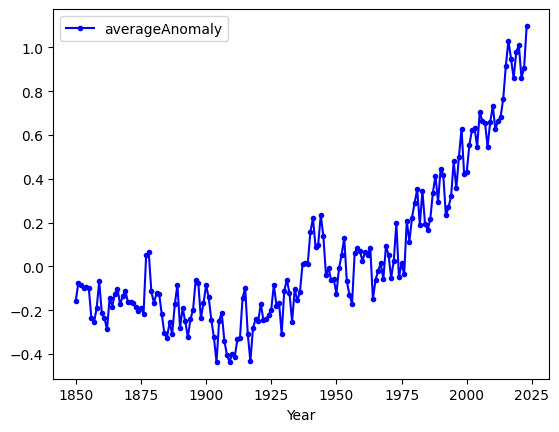

In [174]:
data_global_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

### Nous allons merger toutes les dataframes pour obtenir toutes les températures dans un seul dataframe

In [175]:
data_mean_temperatures = data_ocean_mean_temperatures.merge(data_land_mean_temperatures, on="Year", how="inner",suffixes=("-ocean","-land")).merge(data_global_mean_temperatures, on="Year", how="inner").rename(columns={'averageAnomaly':'averageAnomaly-global'})
data_mean_temperatures

,Year,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global
0,1850,-0.058333,-0.373333,-0.156667
1,1851,0.003333,-0.246667,-0.074167
2,1852,0.027500,-0.343333,-0.085833
3,1853,0.009167,-0.336667,-0.096667
4,1854,-0.016667,-0.265833,-0.091667
...,...,...,...,...
169,2019,0.738333,1.508333,0.978333
170,2020,0.725000,1.647500,1.010833
171,2021,0.630833,1.371667,0.860000
172,2022,0.669167,1.430000,0.905833


In [176]:
data_mean_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   174 non-null    int64  
 1   averageAnomaly-ocean   174 non-null    float64
 2   averageAnomaly-land    174 non-null    float64
 3   averageAnomaly-global  174 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 5.6 KB


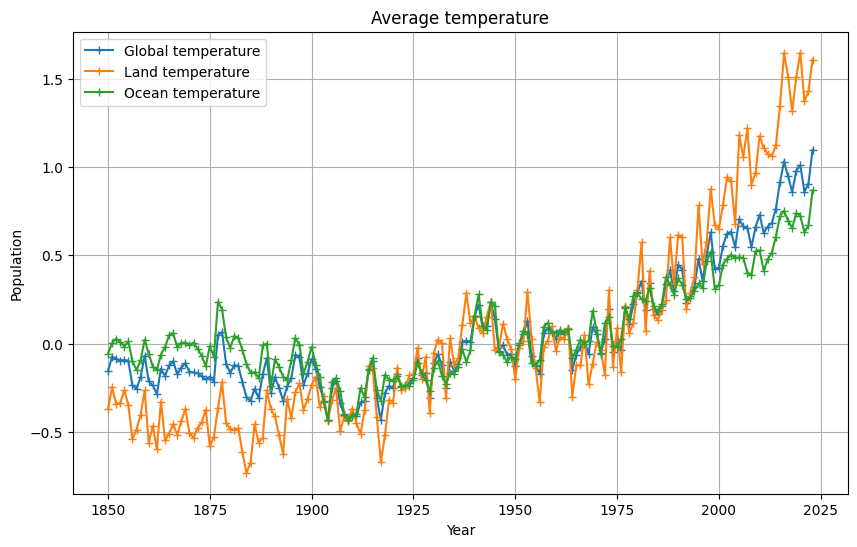

In [177]:
plt.figure(figsize=(10, 6))
plt.plot(data_mean_temperatures['Year'], data_mean_temperatures['averageAnomaly-global'], marker='+', label='Global temperature')
plt.plot(data_mean_temperatures['Year'], data_mean_temperatures['averageAnomaly-land'], marker='+', label='Land temperature')
plt.plot(data_mean_temperatures['Year'], data_mean_temperatures['averageAnomaly-ocean'], marker='+', label='Ocean temperature')

# Configuration du graphique
plt.title('Average temperature')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()

## C. Populations mondiales, répartitions rurales/urbaines mondiales

Il s'agit du facteur démographique de notre projet. Nous pouvons récupérer les répartitions rurales et urbaines pour chaque pays entre 1950 et 2021. Nous avons récupéré les données sur le site FAO(Food and Agriculture Organization) des Nations Unies : https://www.fao.org/faostat/en/#data/OA. 
A partir des données pour chaque pays, nous appliquer des méthodes pour créer des valeurs mondiales et pouvoir mieux les utiliser dans nos futurs modèles. 

Fichier csv :
- "FAOSTAT_data_en_10-21-2023.csv"

### Si on observe les données en détail surtout pour la plage d'années 1950-1960 et 2010-2021, on peut remarquer des anomalies. Les données sont beaucoup plus grandes que la réalité. Par exemple pour l'année 2021 il y +9 milliards d'habitants. Avec des recherches nous avons trouvé pourquoi. Le site disposait des données de 1960 à 2010. Ils sont fait un modèle de prédiction et ont prédit les données pour la plage d'années 1950-1960 et 2010-2021. Lors de la conception de nos modèles, il faudra prendre en compte ces incertitudes dûes au modèle utilisé par le site.

In [27]:
data_population = pd.read_csv("FAOSTAT_data_en_10-21-2023.csv")
data_population.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [28]:
data_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46729 entries, 0 to 46728
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       46729 non-null  object 
 1   Domain            46729 non-null  object 
 2   Area Code (M49)   46729 non-null  int64  
 3   Area              46729 non-null  object 
 4   Element Code      46729 non-null  int64  
 5   Element           46729 non-null  object 
 6   Item Code         46729 non-null  int64  
 7   Item              46729 non-null  object 
 8   Year Code         46729 non-null  int64  
 9   Year              46729 non-null  int64  
 10  Unit              46729 non-null  object 
 11  Value             46729 non-null  float64
 12  Flag              46729 non-null  object 
 13  Flag Description  46729 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 5.3+ MB


In [29]:
data_population.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1950,1950,1000 No,7480.461,X,Figure from international organizations,NaN
1,OA,Annual population,4,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,1950,1950,1000 No,7286.991,X,Figure from international organizations,NaN
2,OA,Annual population,4,Afghanistan,561,Urban population,3010,Population - Est. & Proj.,1950,1950,1000 No,465.127,X,Figure from international organizations,NaN
3,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1951,1951,1000 No,7571.537,X,Figure from international organizations,NaN
4,OA,Annual population,4,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,1951,1951,1000 No,7352.856,X,Figure from international organizations,NaN


Nous avons dropé les colonnes qui ne nous servent pas à grand chose.

In [30]:
columns_to_drop = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code','Item' ,'Year Code', 'Unit', 'Flag', 'Flag Description', 'Note']
data_population = data_population.drop(columns=columns_to_drop)

In [31]:
data_population.head()

,Area,Element,Year,Value
0,Afghanistan,Total Population - Both sexes,1950,7480.461
1,Afghanistan,Rural population,1950,7286.991
2,Afghanistan,Urban population,1950,465.127
3,Afghanistan,Total Population - Both sexes,1951,7571.537
4,Afghanistan,Rural population,1951,7352.856


Le format de notre dataframe n'est pas adapté pour l'utilisation dans un modèle. 

Nous avons envisagé plusieurs solutions. Nous avons choisi d'utiliser la fonction groupby() de pandas avec la fonction sum() pour regrouper toutes les données par pays et construire des données mondiales. 

In [32]:
data_population_world = data_population.groupby(['Year', 'Element'], as_index=False).sum()
data_population_world = data_population_world.drop(columns='Area')


data_population_world

,Year,Element,Value
0,1950,Rural population,2280229.823
1,1950,Total Population - Both sexes,3052233.343
2,1950,Urban population,820258.014
3,1951,Rural population,2314969.612
4,1951,Total Population - Both sexes,3106064.189
...,...,...,...
211,2020,Total Population - Both sexes,9296039.555
212,2020,Urban population,5281071.704
213,2021,Rural population,3957486.848
214,2021,Total Population - Both sexes,9365395.016


En utilisant cette méthode nous nous retrouvons avec la colonne 'Year' qui se répète 3 fois. Une fois pour chaque valeur de Element. Ce n'est pas encore suffisant. Il faudrait transformer les valeurs de la colonne 'Elemnent' en colonnes et les valeurs dans 'Value' deviendront les valeurs associées. 

Nous avons utilisé la fonction pivot, pour transformer notre dataframe en pivot table.

In [33]:
data_population_world = data_population_world.pivot(index=['Year'], columns='Element', values='Value').reset_index()
data_population_world.columns.name = None

data_population_world.head()

,Year,Rural population,Total Population - Both sexes,Urban population
0,1950,2280229.823,3052233.343,820258.014
1,1951,2314969.612,3106064.189,848615.115
2,1952,2346274.223,3164936.679,876864.771
3,1953,2374872.565,3227766.777,905829.315
4,1954,2401878.756,3292431.502,935690.068


La noouvelle colonne 'Total Population - Both sexes' ne correspond pas à la somme des colonnes 'Urban population' et 'Rural population'. Nous avons drop la colonne et avons créé la nouvelle colonne 'Total population' comme la somme des deux.

In [34]:
data_population_world = data_population_world.drop(columns='Total Population - Both sexes')
data_population_world['Total population'] = data_population_world['Urban population'] + data_population_world['Rural population']

data_population_world

,Year,Rural population,Urban population,Total population
0,1950,2280229.823,820258.014,3100487.837
1,1951,2314969.612,848615.115,3163584.727
2,1952,2346274.223,876864.771,3223138.994
3,1953,2374872.565,905829.315,3280701.880
4,1954,2401878.756,935690.068,3337568.824
...,...,...,...,...
67,2017,4007890.027,4983503.377,8991393.404
68,2018,3996201.638,5083419.009,9079620.647
69,2019,3983886.503,5182643.555,9166530.058
70,2020,3970976.303,5281071.704,9252048.007


#### Graphe de l'évolution des populations rurals et urbaines dans le monde

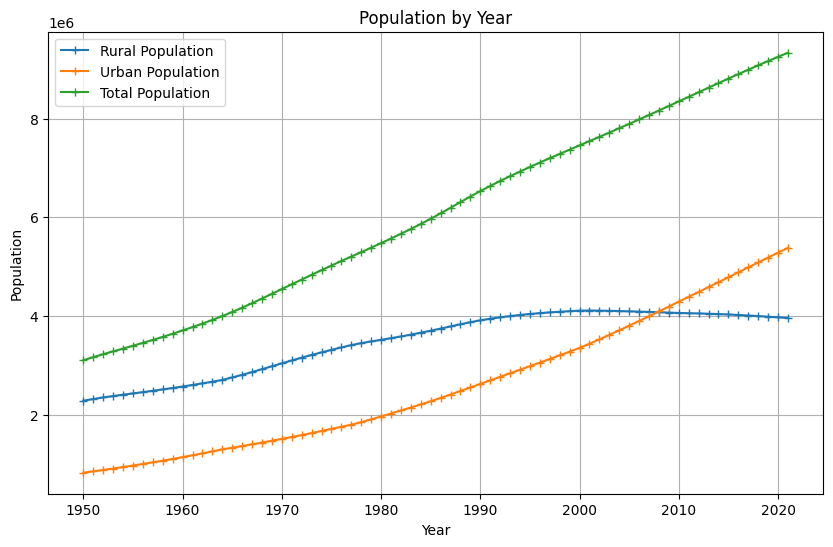

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(data_population_world['Year'], data_population_world['Rural population'], marker='+', label='Rural Population')
plt.plot(data_population_world['Year'], data_population_world['Urban population'], marker='+', label='Urban Population')
plt.plot(data_population_world['Year'], data_population_world['Total population'], marker='+', label='Total Population')

# Configuration du graphique
plt.title('Population by Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()

## D. Emissions totales des ghg en fonction des différents secteurs.

Nous avons pu récupérer sur le site de l'ONU FAO un dataset avec les données des émissions de gaz à effet de serre par pays en fonction du secteur et du type d'emission entre les années 1961 et 2020. On remarque que nous avons aussi les valeurs pour les années entre 2030 et 2050. On peut donc en conclure que le site AFO a fait un modèle de prédiction pour prédire ces valeurs.

Fichier csv :

- 'Emissions_Totals_E_All_Data_NOFLAG.csv'

Pour rendre ces données utilisables dans un modèle avec nos autres données, nous devons effectuer une grosse partie de préprocessing.

In [3]:
data_total_emissions = pd.read_csv('Emissions_Totals_E_All_Data_NOFLAG.csv', encoding='ISO-8859-1')
data_total_emissions.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Source Code,Source,Unit,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2030,Y2050
0,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),3050,FAO TIER 1,kilotonnes,...,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170,1.5337,1.9389
1,2,'004,Afghanistan,5064,Crop Residues,7236,Indirect emissions (N2O),3050,FAO TIER 1,kilotonnes,...,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963,0.3451,0.4362
2,2,'004,Afghanistan,5064,Crop Residues,7230,Emissions (N2O),3050,FAO TIER 1,kilotonnes,...,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133,1.8788,2.3751
3,2,'004,Afghanistan,5064,Crop Residues,724313,Emissions (CO2eq) from N2O (AR5),3050,FAO TIER 1,kilotonnes,...,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,497.8929,629.4047
4,2,'004,Afghanistan,5064,Crop Residues,723113,Emissions (CO2eq) (AR5),3050,FAO TIER 1,kilotonnes,...,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,497.8929,629.4047


In [4]:
data_total_emissions = data_total_emissions.drop(columns=[col for col in data_total_emissions.columns if 'Code' in col])
data_total_emissions = data_total_emissions.drop(columns=['Unit','Y2030','Y2050'])

In [5]:
data_total_emissions.head()

,Area,Item,Element,Source,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),FAO TIER 1,0.8762,0.8829,0.8236,0.8882,0.8978,0.8466,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),FAO TIER 1,0.1972,0.1987,0.1853,0.1998,0.2020,0.1905,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),FAO TIER 1,1.0734,1.0816,1.0089,1.0880,1.0998,1.0371,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),FAO TIER 1,284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),FAO TIER 1,284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


In [6]:
print(data_total_emissions.Element.unique())

['Direct emissions (N2O)' 'Indirect emissions (N2O)' 'Emissions (N2O)'
 'Emissions (CO2eq) from N2O (AR5)' 'Emissions (CO2eq) (AR5)'
 'Emissions (CH4)' 'Emissions (CO2eq) from CH4 (AR5)' 'Emissions (CO2)'
 'Emissions (CO2eq) from F-gases (AR5)']


On supprime les lignes avec la valeur 'UNFCCC' dans la colonne 'Source'

In [7]:
# On supprime les lignes avec la valeur 'UNFCCC' dans la colonne 'Source'
data_total_emissions = data_total_emissions[data_total_emissions['Source'] != 'UNFCCC'].drop(columns=['Source'])

Nous avons supprimé les colonnes et lignes qui ne nous interessaient pas. Le dataframe tel quel n'est toujours pas utilisbale. Nous devons modifier le jeu de données pour l'adapter aux autres. Entre autres, nous devons avoir les année en ligne plutôt qu'en ligne. 

Voici les étapes détaillées de la transformation : 

- Nous avons utilisé la fonction melt de pandas pour regrouper l'ensemble des colonnes "Year_" dans une seule colonne "Year". Le nom des colonnes deviennet des lignes. Les colonnes "Item","Area","Element" restent inchangées. Nous avons créé de plus une colonne "Emissions" qui possède les valeurs pour les années.

- Nous avons créé une nouvelle colonne 'Category' en combinant les valeurs des colonnes 'Item', 'Element', et 'Area' à l'aide de la fonction apply et de la fonction lambda. Nous avons joint les colonnes.

- Nous avons supprimé les colonnes 'Item', 'Element', et 'Area' qui ne nous servaient plus.

- Les valeurs sont exprimées en kilotonnes dans le jeu de données, nous les avons converti en kilogrammes.

- Nous avons finalement extrait les années de la colonne 'Year'.

In [8]:
import warnings
warnings.filterwarnings("ignore")

melted_data_total_emissions = pd.melt(data_total_emissions, id_vars=['Area', 'Item', 'Element'], var_name='Year', value_name='Emissions')
melted_data_total_emissions['Category'] = melted_data_total_emissions[['Item', 'Element', 'Area']].apply(lambda x: ' - '.join(x), axis=1)
melted_data_total_emissions = melted_data_total_emissions.drop(columns=['Area','Item','Element'])

# L'unité des émissions est le kilotonnes, on le transforme en kilogrammes.
melted_data_total_emissions['Emissions'] = melted_data_total_emissions['Emissions'] * 1000000
melted_data_total_emissions['Year'] = melted_data_total_emissions['Year'].str.extract('(\d+)').astype(int)


In [9]:
melted_data_total_emissions

,Year,Emissions,Category
0,1961,8.762000e+05,Crop Residues - Direct emissions (N2O) - Afgha...
1,1961,1.972000e+05,Crop Residues - Indirect emissions (N2O) - Afg...
2,1961,1.073400e+06,Crop Residues - Emissions (N2O) - Afghanistan
3,1961,2.844486e+08,Crop Residues - Emissions (CO2eq) from N2O (AR...
4,1961,2.844486e+08,Crop Residues - Emissions (CO2eq) (AR5) - Afgh...
...,...,...,...
3231175,2020,1.088919e+13,All sectors without LULUCF - Emissions (CO2) -...
3231176,2020,9.208261e+11,All sectors without LULUCF - Emissions (CO2eq)...
3231177,2020,1.825476e+12,All sectors without LULUCF - Emissions (CO2eq)...
3231178,2020,8.009744e+11,All sectors without LULUCF - Emissions (CO2eq)...


Finalement nous utilisons la méthode pivot pour obtenir la table pivot puis nous réinitialisons l'index et donnons un nom à l'index et aux colonnes.

In [10]:
# Nous utilisons la méthode pivot pour obtenir la table pivot
final_data_total_emissions = melted_data_total_emissions.pivot(index='Year', columns='Category', values='Emissions')

# Nous réinitialisons l'index et donnons un nom à l'index et aux colonnes
final_data_total_emissions.reset_index(inplace=True)
final_data_total_emissions.columns.name = None

In [11]:
final_data_total_emissions.head()

,Year,AFOLU - Emissions (CH4) - Afghanistan,AFOLU - Emissions (CH4) - Africa,AFOLU - Emissions (CH4) - Albania,AFOLU - Emissions (CH4) - Algeria,AFOLU - Emissions (CH4) - American Samoa,AFOLU - Emissions (CH4) - Americas,AFOLU - Emissions (CH4) - Andorra,AFOLU - Emissions (CH4) - Angola,AFOLU - Emissions (CH4) - Anguilla,...,Waste - Emissions (N2O) - Venezuela (Bolivarian Republic of),Waste - Emissions (N2O) - Viet Nam,Waste - Emissions (N2O) - Western Africa,Waste - Emissions (N2O) - Western Asia,Waste - Emissions (N2O) - Western Europe,Waste - Emissions (N2O) - World,Waste - Emissions (N2O) - Yemen,Waste - Emissions (N2O) - Yugoslav SFR,Waste - Emissions (N2O) - Zambia,Waste - Emissions (N2O) - Zimbabwe
0,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le jeu de données est mainteant utilisable. Nous pouvons récupérer les données dont nous nous avons besoin pour un futur modèle.

### Nous ne récupérons que les valeurs pour la zone géographique "World" (Monde)

In [12]:
final_data_total_emissions_world = final_data_total_emissions[[col for col in final_data_total_emissions.columns if 'World' in col or 'Year' in col]]
print(f"Nombre de valeurs manquantes : {final_data_total_emissions_world.isna().sum().sum()}")

Nombre de valeurs manquantes : 5249


In [14]:
final_data_total_emissions_world.head()

,Year,AFOLU - Emissions (CH4) - World,AFOLU - Emissions (CO2) - World,AFOLU - Emissions (CO2eq) (AR5) - World,AFOLU - Emissions (CO2eq) from CH4 (AR5) - World,AFOLU - Emissions (CO2eq) from N2O (AR5) - World,AFOLU - Emissions (N2O) - World,Agricultural Soils - Direct emissions (N2O) - World,Agricultural Soils - Emissions (CO2eq) (AR5) - World,Agricultural Soils - Emissions (CO2eq) from N2O (AR5) - World,...,Synthetic Fertilizers - Emissions (CO2eq) (AR5) - World,Synthetic Fertilizers - Emissions (CO2eq) from N2O (AR5) - World,Synthetic Fertilizers - Emissions (N2O) - World,Synthetic Fertilizers - Indirect emissions (N2O) - World,Waste - Emissions (CH4) - World,Waste - Emissions (CO2) - World,Waste - Emissions (CO2eq) (AR5) - World,Waste - Emissions (CO2eq) from CH4 (AR5) - World,Waste - Emissions (CO2eq) from N2O (AR5) - World,Waste - Emissions (N2O) - World
0,1961,NaN,NaN,NaN,NaN,NaN,NaN,1.842093e+09,6.337327e+11,6.337327e+11,...,6.320945e+10,6.320945e+10,238526200.0,58506400.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1962,NaN,NaN,NaN,NaN,NaN,NaN,1.898113e+09,6.529806e+11,6.529806e+11,...,7.133256e+10,7.133256e+10,269179500.0,66025200.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1963,NaN,NaN,NaN,NaN,NaN,NaN,1.944163e+09,6.688706e+11,6.688706e+11,...,8.053092e+10,8.053092e+10,303890300.0,74539100.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1964,NaN,NaN,NaN,NaN,NaN,NaN,2.006306e+09,6.898036e+11,6.898036e+11,...,9.024583e+10,9.024583e+10,340550300.0,83531200.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1965,NaN,NaN,NaN,NaN,NaN,NaN,2.078881e+09,7.149625e+11,7.149625e+11,...,1.040795e+11,1.040795e+11,392752700.0,96335600.0,NaN,NaN,NaN,NaN,NaN,NaN


### Remplissage des valeurs manquantes avec une méthode d'imputation de la librairie python de Sklearn

Nous pouvons observer des données manquantes dans le jeu de données pour les années comprises entre 1961 et 1989. Nous avons plusieurs méthodes à disposition pour remplir ces valeurs NaN dans le jeu de données. Nous avons choisi d'utiliser un IterativeImputer() de la librairie Sklearn

In [17]:
# imputer = IterativeImputer()

# imputer.fit(final_data_total_emissions_world.iloc[:,1:])
# final_data_total_emissions_world_imputed = imputer.transform(final_data_total_emissions_world.iloc[:,1:])

In [18]:
# final_data_total_emissions_world_imputed

Nous nous sommes arrêtés à ce moment pour le préprocessing de la table.

# 2. Modèles Temporels et Réseau de Neurones

## A. Modèles préliminaires : vers un premier modèle sur les données de températures globales, terrestres et maritimes

Nous avons utilisé un modèle ARIMA. Nous avons développé et détaillé étape par étape la mise en place de ce premier modèle. 
Il ne va s'agir que d'un modèle d'exploration.  

Pour pouvoir faire le modèle de prédiction, nous avons transformé la colonne 'Year' en Index et en objet DateTime. 

<Axes: xlabel='Year'>

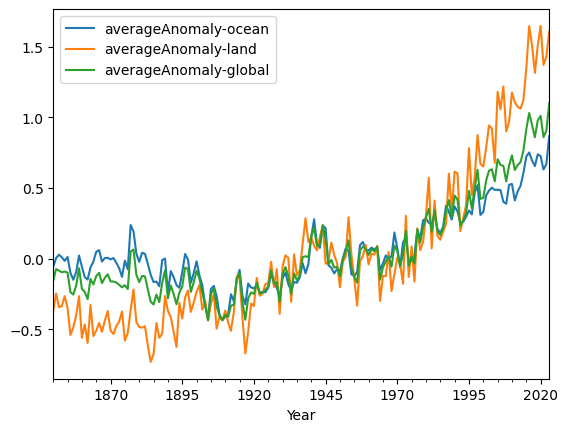

In [36]:
data_mean_temperatures['Year'] = pd.to_datetime(data_mean_temperatures['Year'], format='%Y')
data_mean_temperatures.set_index('Year', inplace=True)

data_mean_temperatures.plot()

### 1. Modèle pour les températures globales

Nous récupérons les données des températures globales

In [37]:
serie_temporelle = data_mean_temperatures[['averageAnomaly-global']]

Nous utilisons la méthode de Dickey-Fuller pour voir si la série est stationnaire. Nous pouvons déjà intuité qu'elle n'est pas stationnaire puisque les variances et moyennes ne semblent pas constante. Cette méthode de visualisation est subjective, faisons un test de Dickey-Fuller pour s'en assurer.

In [55]:
_, p, _, _, _, _ = adfuller(serie_temporelle)
print("La p-value est de: ", round(p, 3))

La p-value est de:  0.998


Le test de Dickey-Fuller renvoie une p-valeur de 0.998 supérieure à 0.05. Nous pouvons rejeter l'hypothèse nulle et affirmer que la série temporelle des températures globales n'est pas stationnaire.

Nous pouvons utiliser 2 modèles possibles : 
- Un modèle ARMA mais en utilisant la méthode de différentiation pour stationnariser la série temporelle. 

- Un modèle ARIMA sur la série temporelle directement. 

Nous avons utilisé ces 2 méthodes.

La série temporelle n'indique pas la présence de saisonnalité. Mais pour s'en assurer, nous allons retirer la saisonnalité avec la fonction seasonal_decompose()


<Axes: xlabel='Year'>

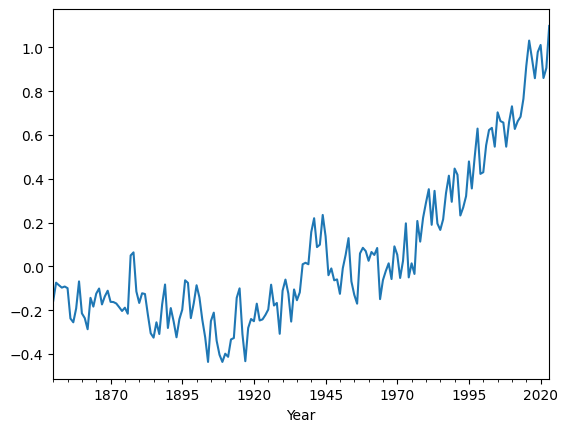

In [41]:
out = seasonal_decompose(serie_temporelle)

x =  out.observed - out.seasonal
x.plot()

In [42]:
adf, pa, *_  = adfuller(x.dropna())
print("p-value adf : ", pa)

p-value adf :  0.997651554053703


La p-value est toujours trop grande, la série temporelle n'est toujours pas stationnaire. Il faut encore modifier la série. Utilisons la différentiation.

In [44]:
for d in range(1,11):
    xd =  x.diff(d)
    adf, pa, *_  = adfuller(xd.dropna())
    print("p-value adf : {}, {}".format(pa, d))

p-value adf : 1.5302564777124872e-12, 1
p-value adf : 0.00045314251303211063, 2
p-value adf : 0.0075249194266351765, 3
p-value adf : 0.0025117877460098196, 4
p-value adf : 0.0002867258286137409, 5
p-value adf : 0.0662518717433156, 6
p-value adf : 0.01811057000275167, 7
p-value adf : 0.01635458664943046, 8
p-value adf : 0.26552580551855937, 9
p-value adf : 0.3930197756268892, 10


La valeur d = 7 pour la différentiation est la limite de stationnarité. On va choisir cette valeur même si on perd quand même un peu l'allure de base. 

<Axes: xlabel='Year'>

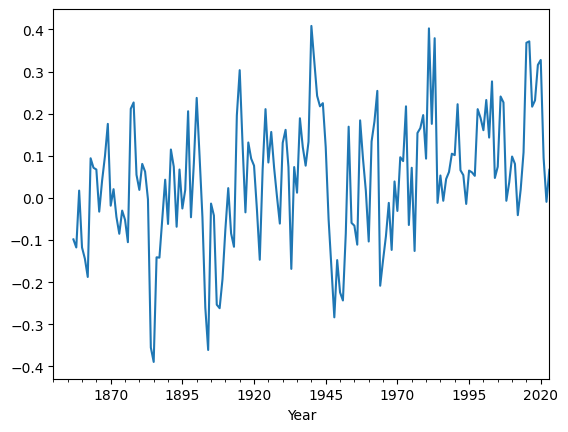

In [45]:
xd =  x.diff(7)

xd.plot()

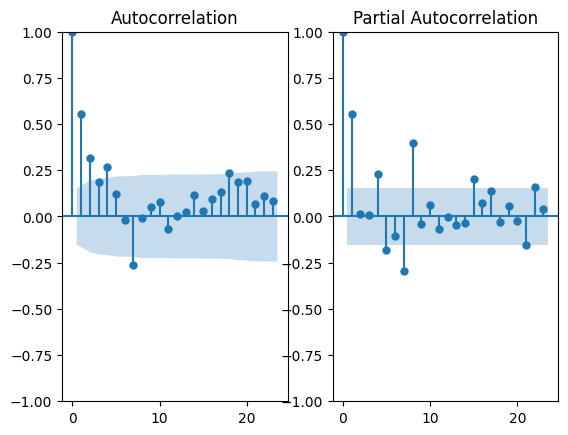

In [46]:
fig, ax = plt.subplots(1,2)
plot_acf(xd.dropna(), ax=ax[0]) 
plot_pacf(xd.dropna(), ax=ax[1]);

On voit 5 pics significatifs sur le PACF, on peut intuiter un AR(5). On voit aussi 5 pics significatifs sur l'ACF, on peut intuiter un MA(5).
On débutera par un ARMA(5,5)

In [49]:
warnings.filterwarnings("ignore")

'''
    DECOMMENTER LES LIGNES POUR VOIR LES CONFIGURATIONS
'''

# for p in [1,2,3,4,5]:
#         for q in [0,1,2,3,4]:
#             arma = ARIMA(x, order=(p,0,q))
#             res = arma.fit()
#             print("p={}, q={} --> AICc = {}".format(p,q, res.aicc))

'\n    DECOMMENTER LES LIGNES POUR VOIR LES CONFIGURATIONS\n'

In [ ]:
warnings.filterwarnings("ignore")

'''
    DECOMMENTER LES LIGNES POUR VOIR LES CONFIGURATIONS
'''

# best_aicc = float('inf')  # Initialiser avec une valeur infinie
# best_params = None
# for p in [1,2,3,4,5]:
#     for d in [0, 1, 2,3,4]:
#         for q in [0, 1, 2,3,4]:
#             arima = ARIMA(serie_temporelle, order=(p,d,q))
#             res = arima.fit()
#             current_aicc = res.aicc
#             print("p={}, d={}, q={} --> AICc = {}".format(p,d,q, current_aicc))

#             if current_aicc < best_aicc:
#                 best_aicc = current_aicc
#                 best_params = (p, d, q)

# print("Meilleure combinaison de paramètres (p, d, q) : {}".format(best_params))

Après plusieurs essais, nous avons défini les meilleures configurations pour les modèles ARMA et ARIMA. 

ARMA : (3,0,1)

ARIMA : (4,2,7)

In [60]:
arma = ARIMA(xd, order=(3,0,1)).fit()

arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  174
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 115.919
Date:                Sun, 12 Nov 2023   AIC                           -219.838
Time:                        23:44:43   BIC                           -200.884
Sample:                    01-01-1850   HQIC                          -212.149
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0441      0.020      2.150      0.032       0.004       0.084
ar.L1         -0.2469      0.102     -2.427      0.015      -0.446      -0.047
ar.L2          0.5444      0.070      7.779      0.000       0.407       0.682
ar.L3         -0.1538      0.087     -1.772      0.076      -0.324       0.016
ma.L1          0.8819      0.073     12.081      0.000       0.739       1.025
sigma2         0.0145      0.002      8.322      0.000       0.011       0.018
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.66   Prob(JB):                         0.90
Heteroskedasticity (H):               0.77   Skew:                            -0.08
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Prédictions du modèle arma avec différentiation sur les températurs globales')

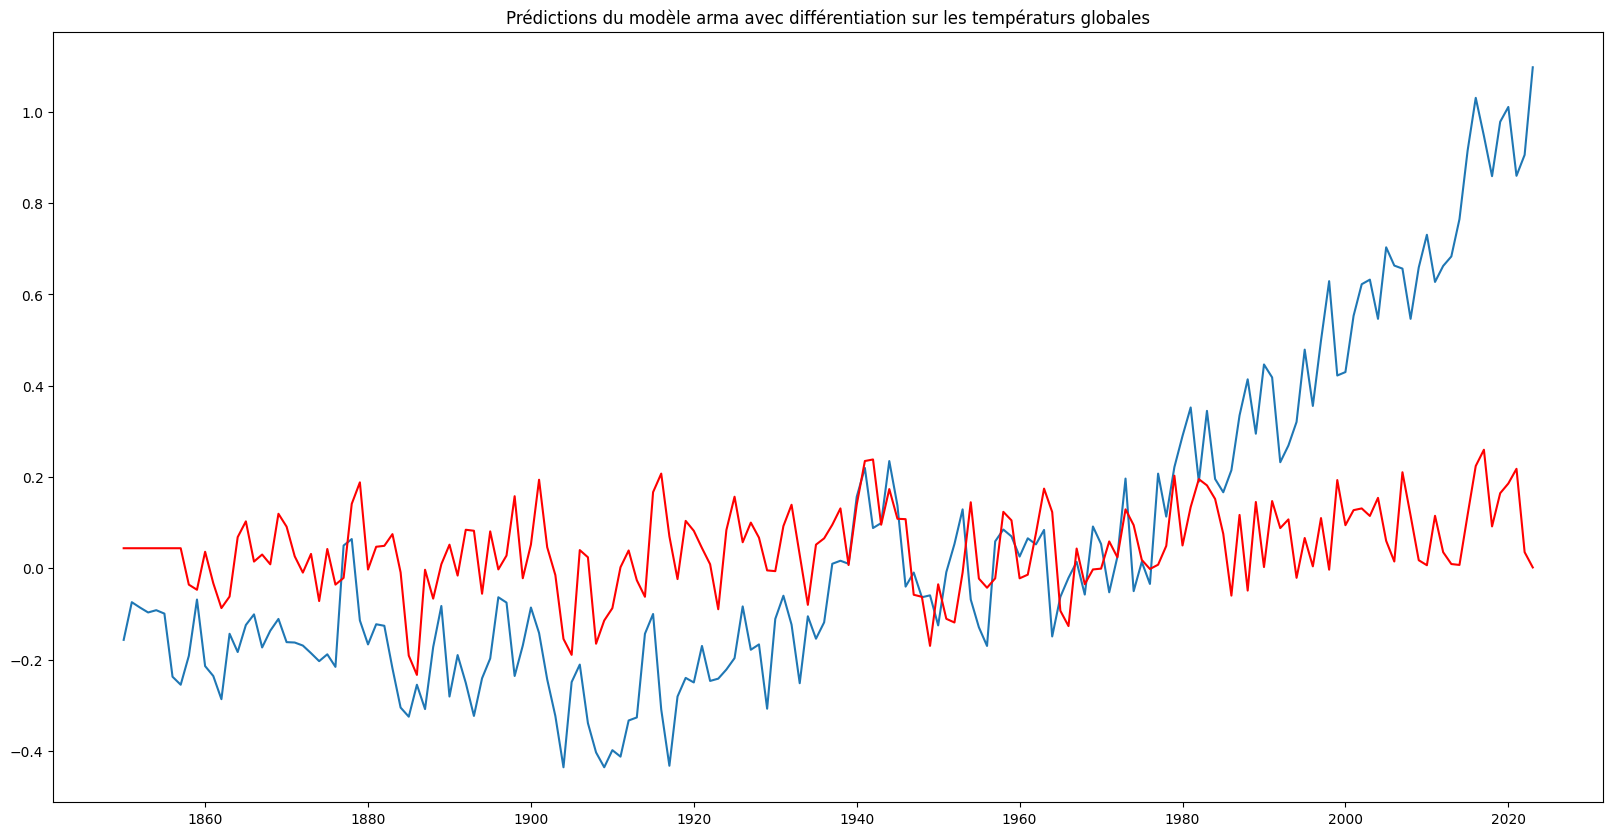

In [61]:
pred = arma.predict()

plt.figure(figsize=(20,10))
plt.plot(serie_temporelle)
plt.plot(pred, color = "r")
plt.title("Prédictions du modèle arma avec différentiation sur les températurs globales")

In [191]:
arima = ARIMA(serie_temporelle, order=(4,2,7)).fit()

Text(0.5, 1.0, 'Prédictions du modèle arima sur les températurs globales')

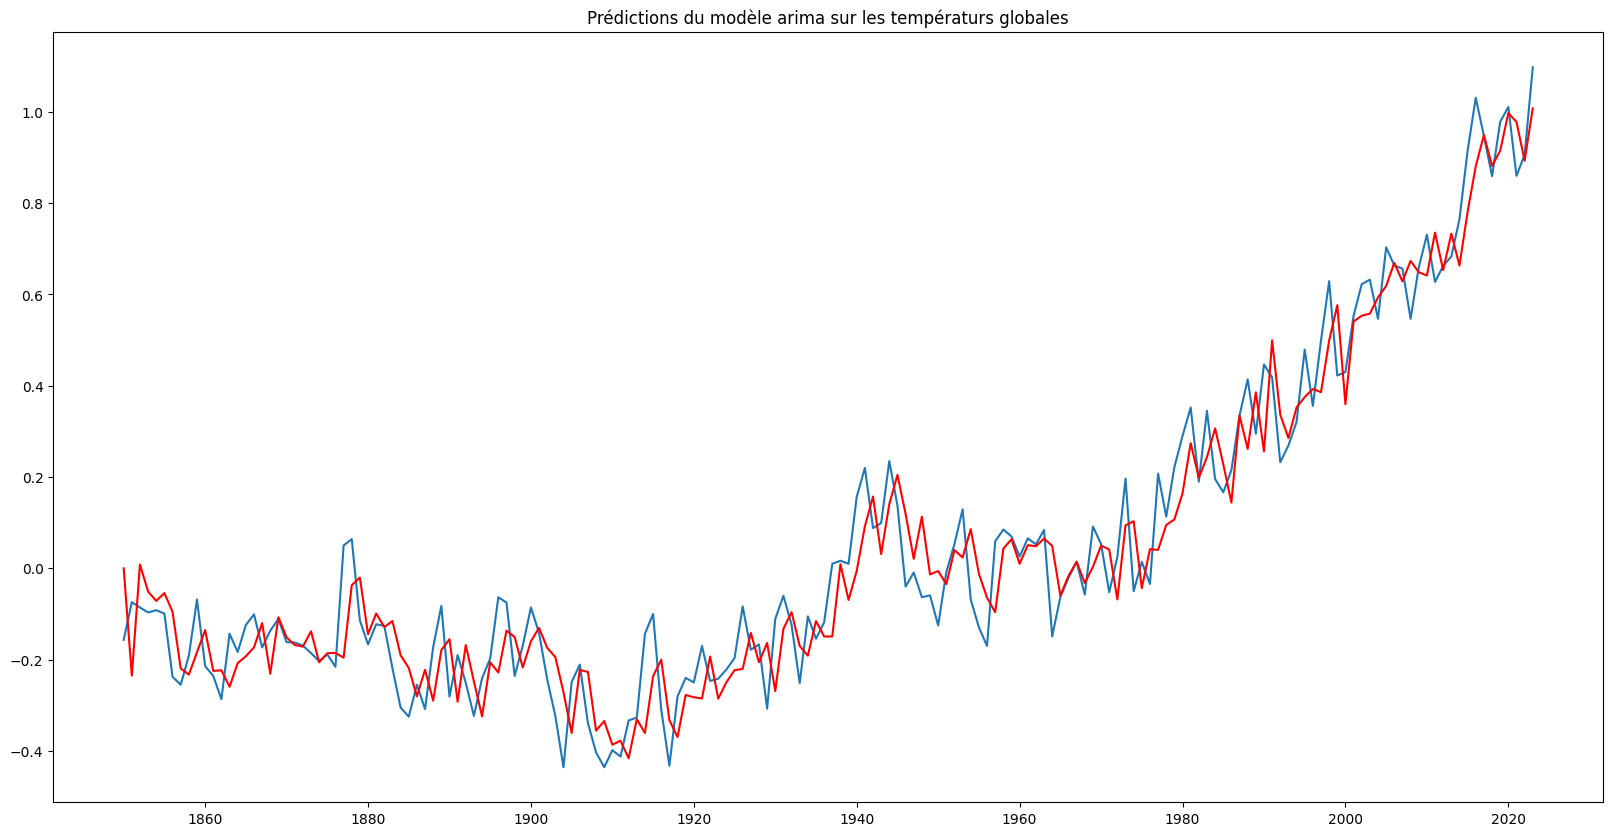

In [192]:
pred = arima.predict()

plt.figure(figsize=(20,10))
plt.plot(serie_temporelle)
plt.plot(pred, color = "r")
plt.title("Prédictions du modèle arima sur les températurs globales")

Le modèle arima est visiblement le meilleur modèle. En faisant la différentiation sur la série temporelle nous avons perdu l'allure de la série. 

Maintenant que nous avons un modèle de prédiction nous pouvons faire des prédictions pour les années futures, càd de 2024 à 2050. 

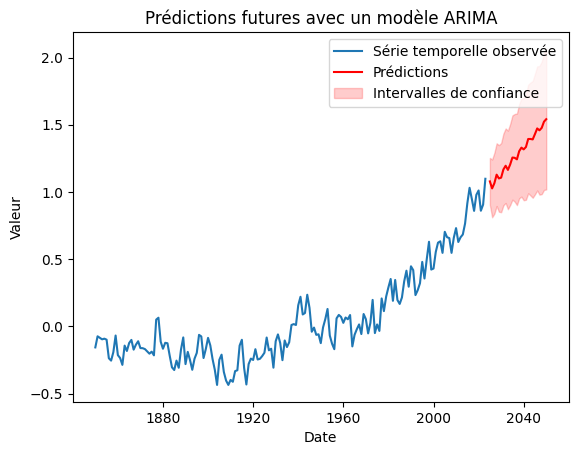

In [193]:
# Nous avons créé les index des futurs prédictions
index_future = pd.date_range(start='2024-01-01', end='2050-01-01', freq='A')

steps = len(index_future)

# Forecast
forecast = arima.get_forecast(steps=steps)

# Nous avons extrait les intervalles de confiance inférieur et supérieur
ci = forecast.conf_int()

# Tracer la série temporelle existante
plt.plot(serie_temporelle.index, serie_temporelle, label='Série temporelle observée')

# Tracer les prédictions
plt.plot(index_future, forecast.predicted_mean, color='red', label='Prédictions')

# Tracer les intervalles de confiance
plt.fill_between(index_future, ci.iloc[:, 0], ci.iloc[:, 1], color='red', alpha=0.2, label='Intervalles de confiance')

plt.legend()
plt.title('Prédictions futures avec un modèle ARIMA')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()

### 2. Températures terrestres

Nous avons appliqué la même méthodologie pour les températures terrestres et maritimes

In [65]:
temperature_land_series = data_mean_temperatures[['averageAnomaly-land']]

In [68]:
_, p, _, _, _, _ = adfuller(temperature_land_series)
print("La p-value est de: ", round(p, 3))

La p-value est de:  0.999


Nous rejettons l'hypothèse nulle. La série est stationnaire.

<Axes: xlabel='Year'>

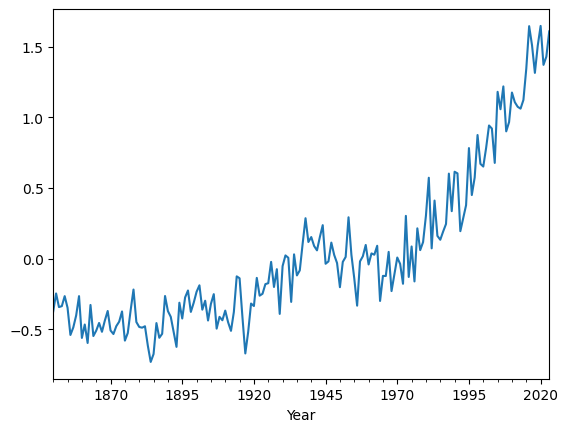

In [66]:
out_land = seasonal_decompose(temperature_land_series)

x_land =  out_land.observed - out_land.seasonal
x_land.plot()

In [67]:
adf, pa, *_  = adfuller(x_land.dropna())
print("p-value adf : ", pa)

p-value adf :  0.9990537394486165


In [70]:
for d in range(1,11):
    xd_land =  temperature_land_series.diff(d)
    adf, pa, *_  = adfuller(xd_land.dropna())
    print("p-value adf : {}, {}".format(pa, d))

p-value adf : 0.0007887528757459876, 1
p-value adf : 0.0010101682785301823, 2
p-value adf : 0.20988886509246008, 3
p-value adf : 0.08860074135580714, 4
p-value adf : 0.09877209103895729, 5
p-value adf : 0.22431766053126084, 6
p-value adf : 0.3643959451567603, 7
p-value adf : 0.21964965247486856, 8
p-value adf : 0.2377519959056384, 9
p-value adf : 0.263629177247535, 10


<Axes: xlabel='Year'>

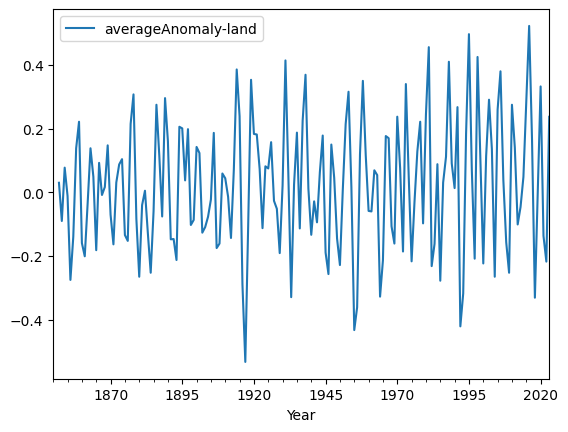

In [71]:
xd_land =  temperature_land_series.diff(2)

xd_land.plot()

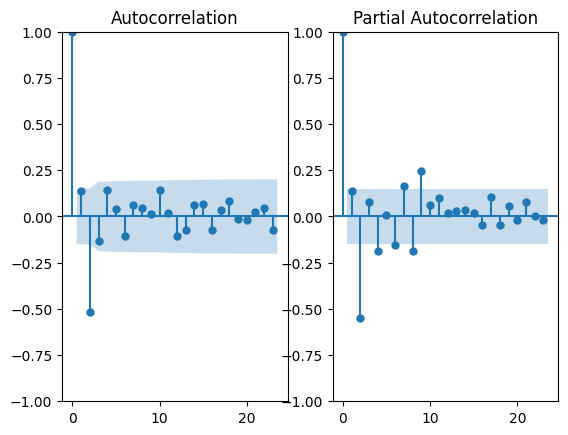

In [72]:
fig, ax = plt.subplots(1,2)
plot_acf(xd_land.dropna(), ax=ax[0]) 
plot_pacf(xd_land.dropna(), ax=ax[1]);

On voit 3 pics significatifs sur le PACF, on peut intuiter AR(3). On voit aussi 2 pics significatifs sur le ACF, on peut intuiter un MA(2).

In [73]:
warnings.filterwarnings("ignore")

# for p in [1,2,3,4,5]:
#         for q in [0, 1, 2,3,4]:
#             arma = ARIMA(x, order=(p,0,q))
#             res = arma.fit()
#             print("p={}, q={} --> AICc = {}".format(p,q, res.aicc))


In [74]:
warnings.filterwarnings("ignore")

# best_aicc = float('inf')  # Initialiser avec une valeur infinie
# best_params = None
# for p in [1,2,3,4,5]:
#     for d in [0, 1, 2,3,4]:
#         for q in [0, 1, 2,3,4]:
#             arma = ARIMA(temperature_land_series, order=(p,d,q))
#             res = arma.fit()
#             current_aicc = res.aicc
#             print("p={}, d={}, q={} --> AICc = {}".format(p,d,q, current_aicc))

#             if current_aicc < best_aicc:
#                 best_aicc = current_aicc
#                 best_params = (p, d, q)

# print("Meilleure combinaison de paramètres (p, d, q) : {}".format(best_params))

In [79]:
arma_land = ARIMA(xd_land, order=(2,0,0)).fit()

arma_land.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     averageAnomaly-land   No. Observations:                  174
Model:                  ARIMA(2, 0, 0)   Log Likelihood                  64.020
Date:                 Mon, 13 Nov 2023   AIC                           -120.040
Time:                         00:04:00   BIC                           -107.404
Sample:                     01-01-1850   HQIC                          -114.914
                          - 01-01-2023                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0218      0.010      2.247      0.025       0.003       0.041
ar.L1          0.2210      0.062      3.575      0.000       0.100       0.342
ar.L2         -0.5530      0.079     -6.973      0.000      -0.708      -0.398
sigma2         0.0277      0.003      9.991      0.000       0.022       0.033
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 3.86
Prob(Q):                              0.51   Prob(JB):                         0.15
Heteroskedasticity (H):               2.46   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

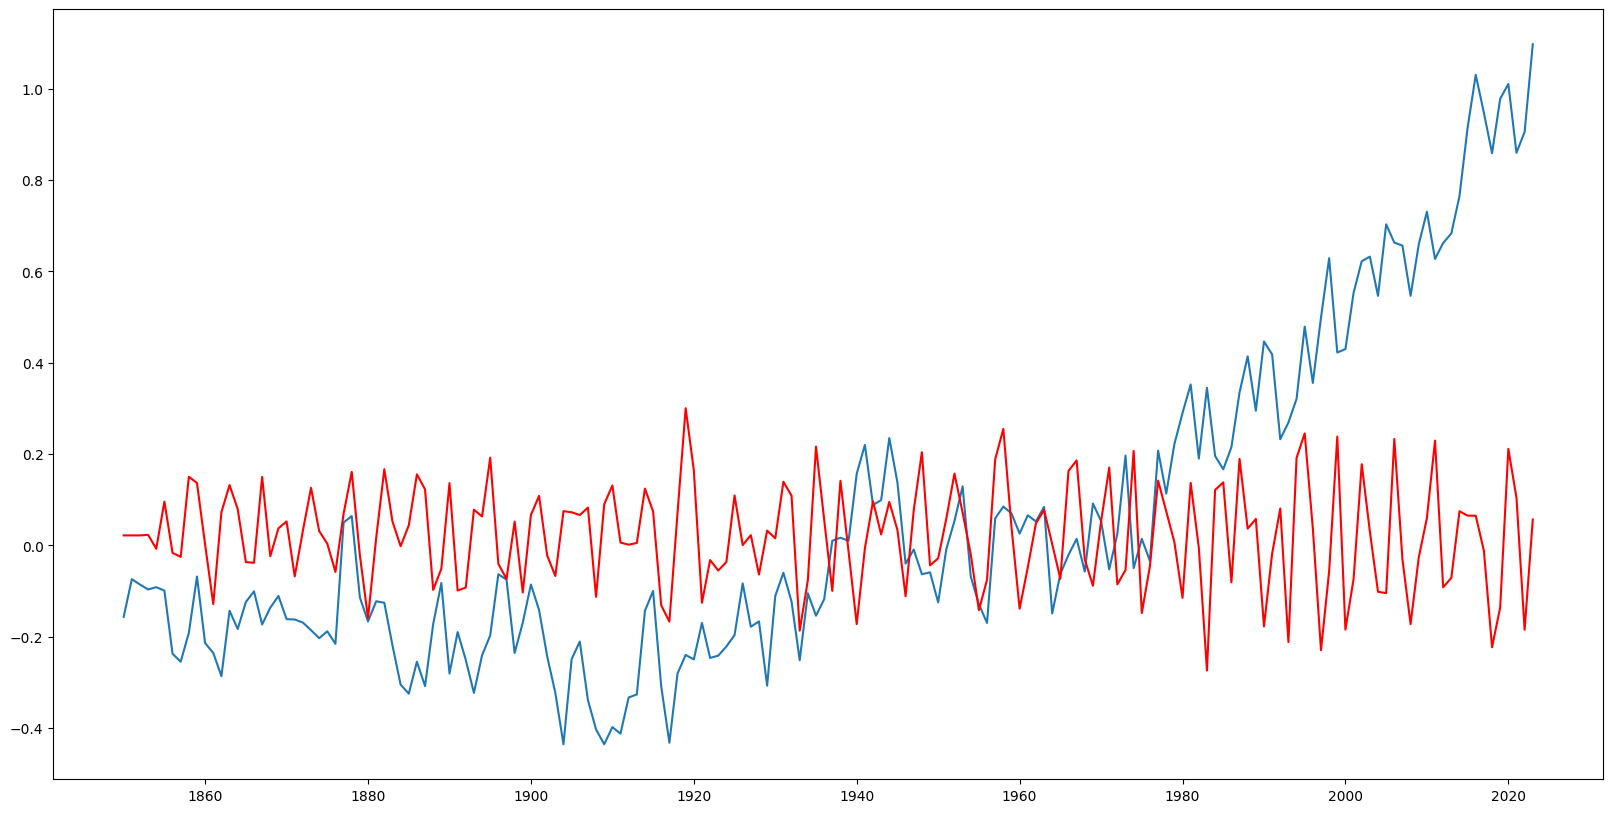

In [80]:
pred_land = arma_land.predict()

plt.figure(figsize=(20,10))
plt.plot(serie_temporelle)
plt.plot(pred_land, color = "r")

In [85]:
arima_land = ARIMA(temperature_land_series, order=(3,2,4)).fit()

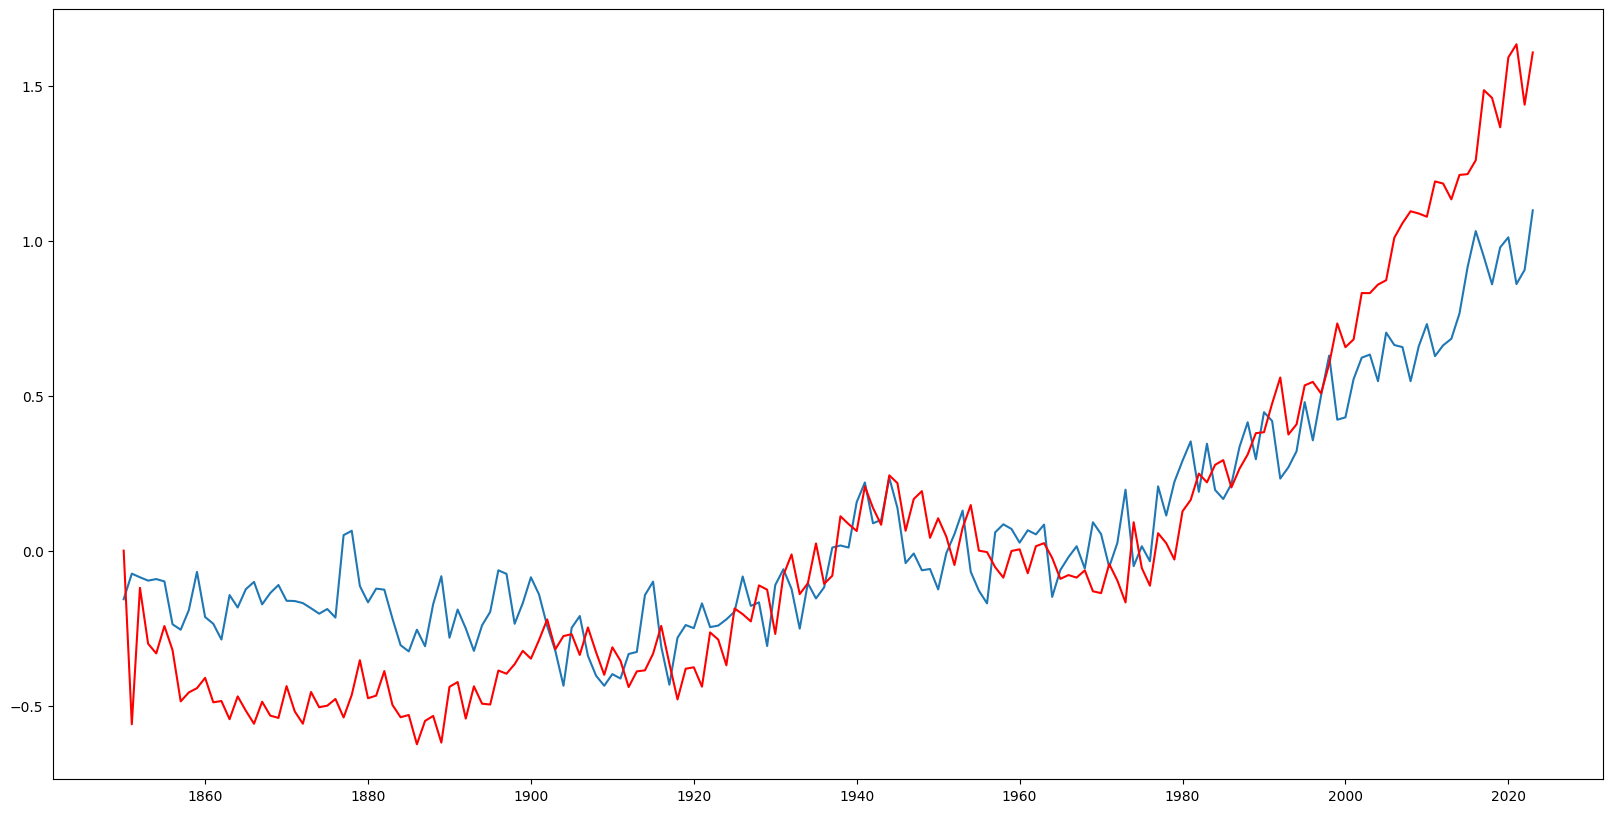

In [86]:
pred_land = arima_land.predict()

plt.figure(figsize=(20,10))
plt.plot(serie_temporelle)
plt.plot(pred_land, color = "r")

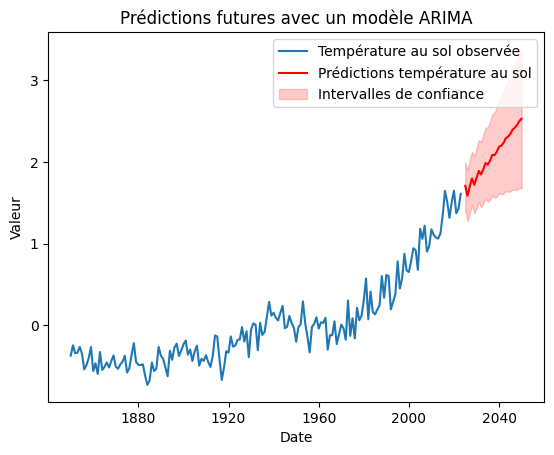

In [87]:
index_future = pd.date_range(start='2024-01-01', end='2050-01-01', freq='A')
steps = len(index_future)

forecast_land = arima_land.get_forecast(steps=steps)

ci_land = forecast_land.conf_int()

plt.plot(temperature_land_series.index, temperature_land_series, label='Température au sol observée')
plt.plot(index_future, forecast_land.predicted_mean, color='red', label='Prédictions température au sol')
plt.fill_between(index_future, ci_land.iloc[:, 0], ci_land.iloc[:, 1], color='red', alpha=0.2, label='Intervalles de confiance')

plt.legend()
plt.title('Prédictions futures avec un modèle ARIMA')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()

### 3. Températures maritimes

In [88]:
temperature_ocean_series = data_mean_temperatures[['averageAnomaly-ocean']]

In [94]:
adf, pa, *_  = adfuller(temperature_ocean_series.dropna())
print("p-value adf : ", pa)

p-value adf :  0.954787848929552


<Axes: xlabel='Year'>

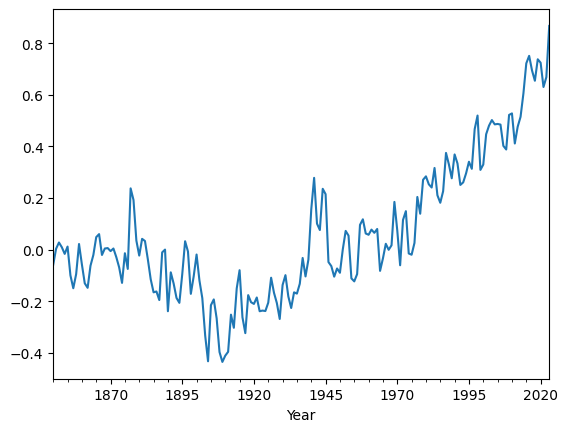

In [95]:
out_ocean = seasonal_decompose(temperature_ocean_series)

x_ocean =  out_ocean.observed - out_ocean.seasonal
x_ocean.plot()

In [96]:
adf, pa, *_  = adfuller(x_ocean.dropna())
print("p-value adf : ", pa)

p-value adf :  0.954787848929552


In [97]:
for d in range(1,11):
    xd_ocean =  x_ocean.diff(d)
    adf, pa, *_  = adfuller(xd_ocean.dropna())
    print("p-value adf : {}, {}".format(pa, d))

p-value adf : 7.624522438304241e-27, 1
p-value adf : 0.0016363861826408368, 2
p-value adf : 0.0003605732323473392, 3
p-value adf : 0.0027478351504460004, 4
p-value adf : 7.85848550362031e-05, 5
p-value adf : 0.03780301236973442, 6
p-value adf : 0.13349087928253223, 7
p-value adf : 0.0697426200020929, 8
p-value adf : 0.18065987672959338, 9
p-value adf : 0.3621487141165929, 10


<Axes: xlabel='Year'>

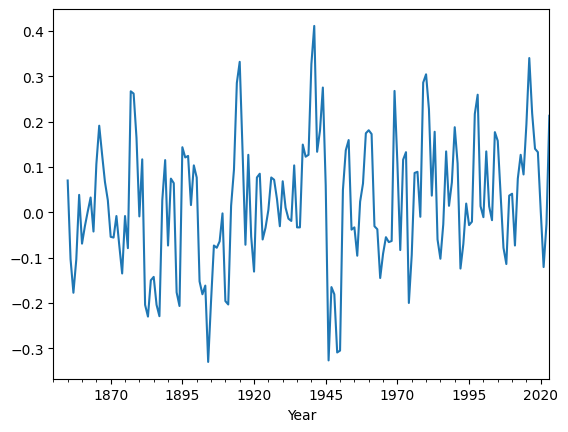

In [98]:
xd_ocean =  x_ocean.diff(5)

xd_ocean.plot()

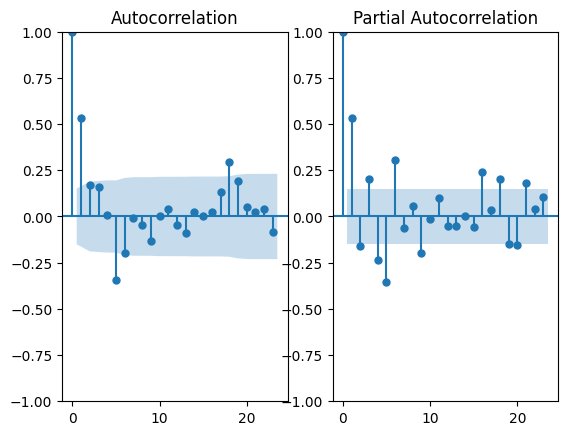

In [99]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2)
plot_acf(xd_ocean.dropna(), ax=ax[0]) 
plot_pacf(xd_ocean.dropna(), ax=ax[1]);

In [100]:
warnings.filterwarnings("ignore")

# for p in [1,2,3,4,5]:
#         for q in [0, 1, 2,3,4]:
#             arma = ARIMA(x, order=(p,0,q))
#             res = arma.fit()
#             print("p={}, q={} --> AICc = {}".format(p,q, res.aicc))

In [101]:
warnings.filterwarnings("ignore")

# best_aicc = float('inf')  # Initialiser avec une valeur infinie
# best_params = None
# for p in [1,2,3,4,5]:
#     for d in [0, 1, 2,3,4]:
#         for q in [0, 1, 2,3,4]:
#             arima = ARIMA(temperature_ocean_series, order=(p,d,q))
#             res = arima.fit()
#             current_aicc = res.aicc
#             print("p={}, d={}, q={} --> AICc = {}".format(p,d,q, current_aicc))

#             if current_aicc < best_aicc:
#                 best_aicc = current_aicc
#                 best_params = (p, d, q)

# print("Meilleure combinaison de paramètres (p, d, q) : {}".format(best_params))

In [102]:
arma_ocean = ARIMA(xd_ocean, order=(6,0,3)).fit()

arma_ocean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  174
Model:                 ARIMA(6, 0, 3)   Log Likelihood                 155.941
Date:                Mon, 13 Nov 2023   AIC                           -289.883
Time:                        00:10:12   BIC                           -255.133
Sample:                    01-01-1850   HQIC                          -275.786
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0219      0.019      1.168      0.243      -0.015       0.059
ar.L1          0.4239      0.110      3.861      0.000       0.209       0.639
ar.L2         -0.3309      0.088     -3.774      0.000      -0.503      -0.159
ar.L3         -0.3049      0.082     -3.709      0.000      -0.466      -0.144
ar.L4          0.4565      0.080      5.730      0.000       0.300       0.613
ar.L5         -0.5504      0.071     -7.751      0.000      -0.690      -0.411
ar.L6          0.2979      0.095      3.143      0.002       0.112       0.484
ma.L1          0.2648      0.080      3.309      0.001       0.108       0.422
ma.L2          0.3785      0.061      6.185      0.000       0.259       0.498
ma.L3          0.8138      0.084      9.671      0.000       0.649       0.979
sigma2         0.0090      0.001      9.480      0.000       0.007       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 6.20
Prob(Q):                              0.43   Prob(JB):                         0.05
Heteroskedasticity (H):               0.70   Skew:                             0.32
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

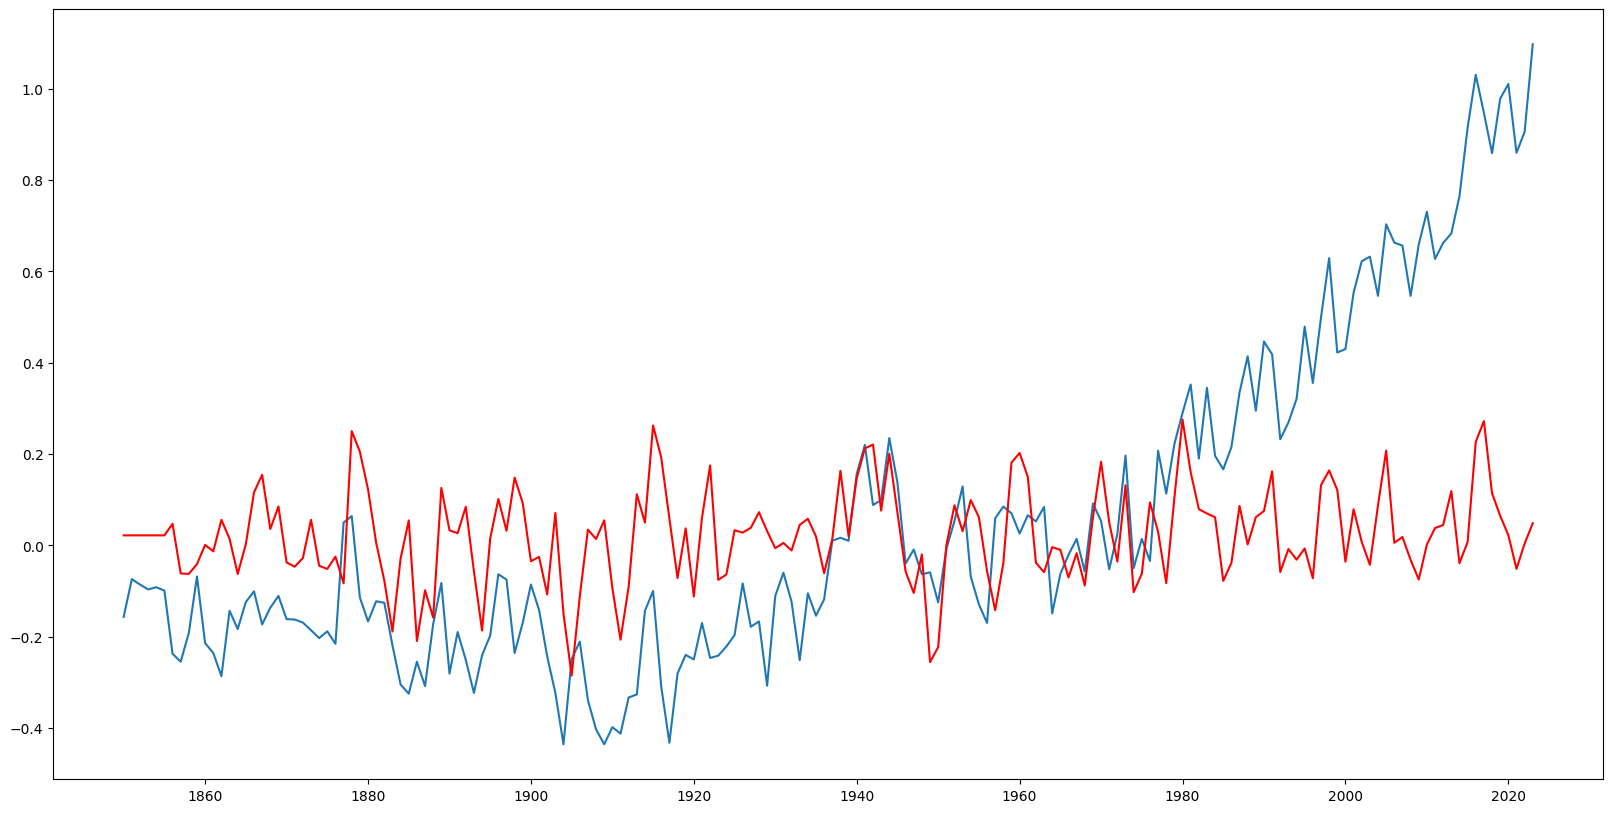

In [105]:
pred_ocean = arma_ocean.predict()

plt.figure(figsize=(20,10))
plt.plot(serie_temporelle)
plt.plot(pred_ocean, color = "r")

In [103]:
arima_ocean = ARIMA(temperature_ocean_series, order=(5,2,3)).fit()

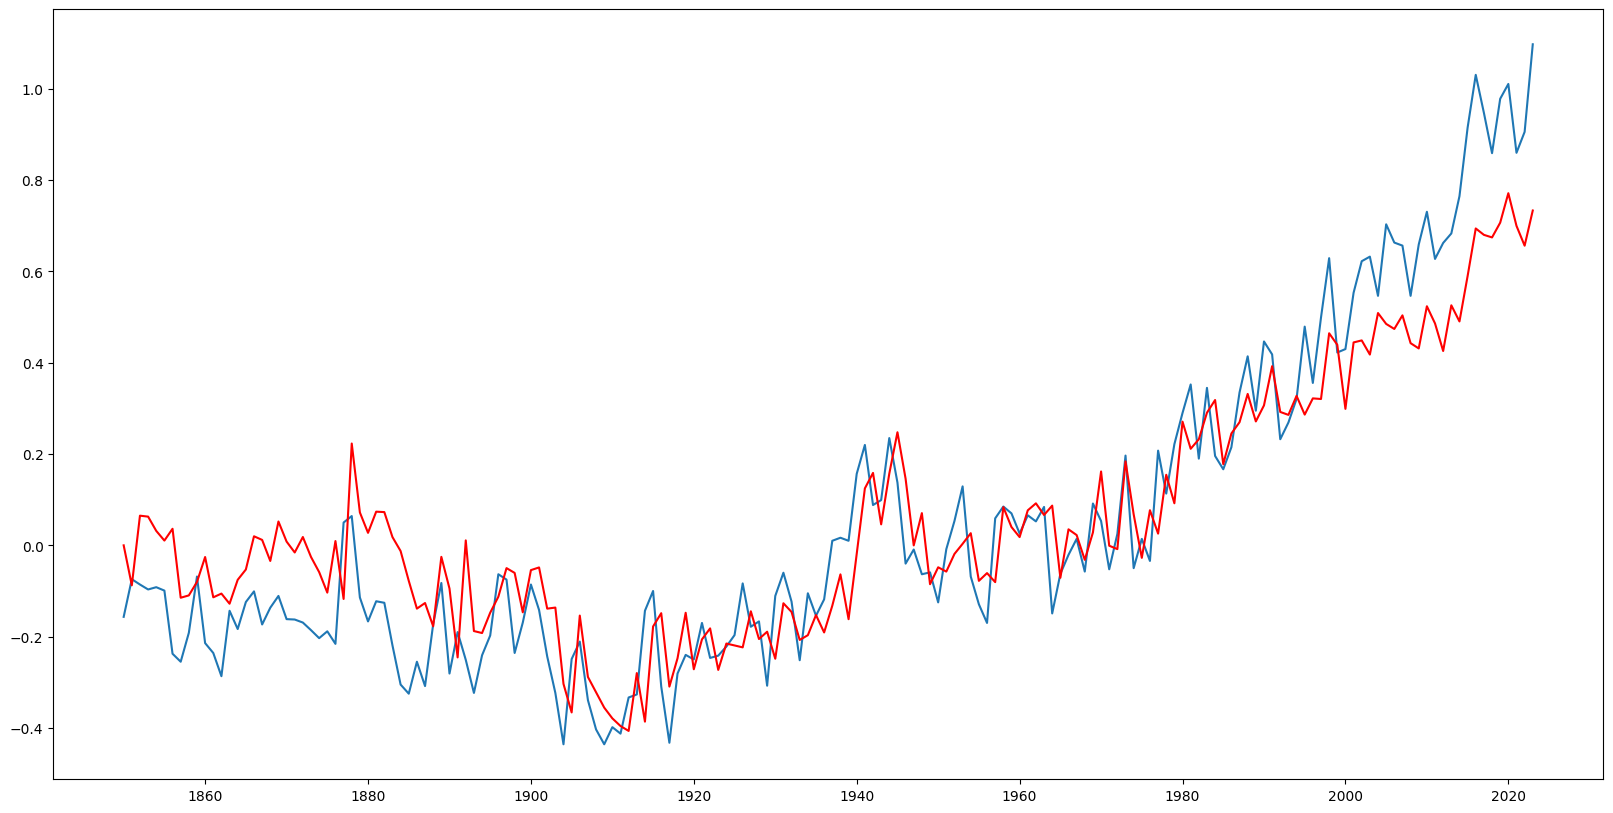

In [104]:
pred_ocean = arima_ocean.predict()

plt.figure(figsize=(20,10))
plt.plot(serie_temporelle)
plt.plot(pred_ocean, color = "r")

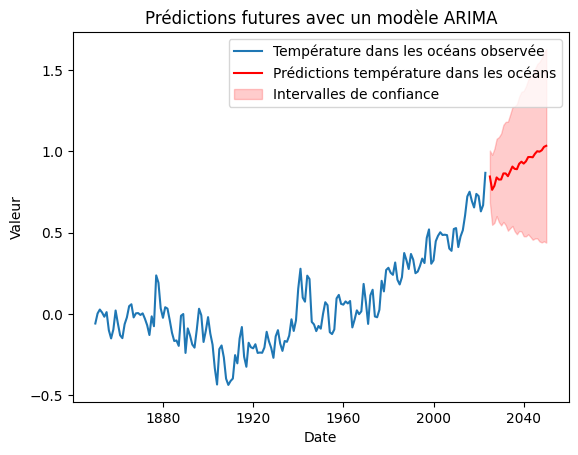

In [106]:
index_future = pd.date_range(start='2024-01-01', end='2050-01-01', freq='A')
steps = len(index_future)

forecast_ocean = arima_ocean.get_forecast(steps=steps)
ci_ocean = forecast_ocean.conf_int()

plt.plot(temperature_ocean_series.index, temperature_ocean_series, label='Température dans les océans observée')
plt.plot(index_future, forecast_ocean.predicted_mean, color='red', label='Prédictions température dans les océans')
plt.fill_between(index_future, ci_ocean.iloc[:, 0], ci_ocean.iloc[:, 1], color='red', alpha=0.2, label='Intervalles de confiance')

plt.legend()
plt.title('Prédictions futures avec un modèle ARIMA')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()

### 4. Toutes les prédictions regroupées.

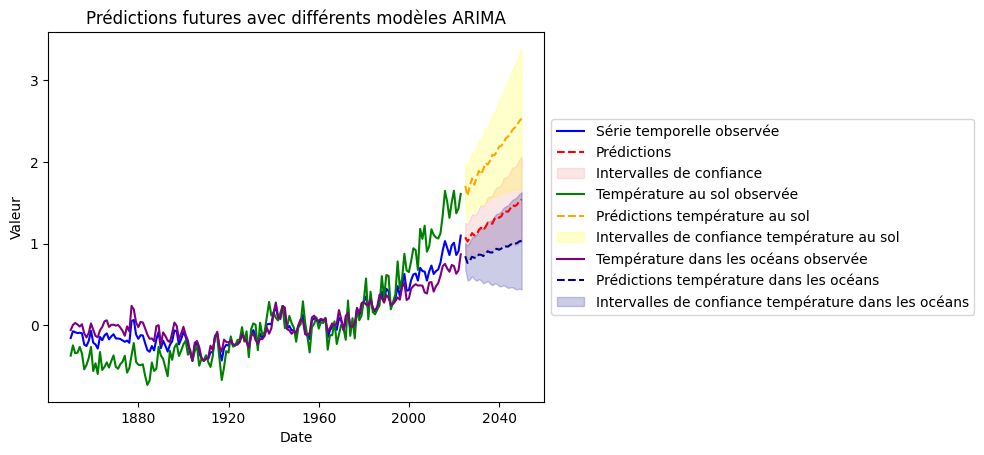

In [108]:
color_serie_temporelle = 'blue'
color_predictions = 'red'
color_intervalles_confiance = 'lightcoral'

plt.plot(serie_temporelle.index, serie_temporelle, label='Série temporelle observée', color=color_serie_temporelle)
plt.plot(index_future, forecast.predicted_mean, color=color_predictions, label='Prédictions', linestyle='--')
plt.fill_between(index_future, ci.iloc[:, 0], ci.iloc[:, 1], color=color_intervalles_confiance, alpha=0.2, label='Intervalles de confiance')
plt.plot(temperature_land_series.index, temperature_land_series, label='Température au sol observée', color='green')
plt.plot(index_future, forecast_land.predicted_mean, color='orange', label='Prédictions température au sol', linestyle='--')
plt.fill_between(index_future, ci_land.iloc[:, 0], ci_land.iloc[:, 1], color='yellow', alpha=0.2, label='Intervalles de confiance température au sol')
plt.plot(temperature_ocean_series.index, temperature_ocean_series, label='Température dans les océans observée', color='purple')
plt.plot(index_future, forecast_ocean.predicted_mean, color='darkblue', label='Prédictions température dans les océans', linestyle='--')
plt.fill_between(index_future, ci_ocean.iloc[:, 0], ci_ocean.iloc[:, 1], color='darkblue', alpha=0.2, label='Intervalles de confiance température dans les océans')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Prédictions futures avec différents modèles ARIMA')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()

## B. Modèle ARIMAX : nous souhaitons prédire les anomalies globales en fonction de facteurs éxogènes

In [110]:
data_mean_temperatures

,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global
Year,,,
1850-01-01,-0.058333,-0.373333,-0.156667
1851-01-01,0.003333,-0.246667,-0.074167
1852-01-01,0.027500,-0.343333,-0.085833
1853-01-01,0.009167,-0.336667,-0.096667
1854-01-01,-0.016667,-0.265833,-0.091667
...,...,...,...
2019-01-01,0.738333,1.508333,0.978333
2020-01-01,0.725000,1.647500,1.010833
2021-01-01,0.630833,1.371667,0.860000


In [113]:
data_population_world_test['Year'] = pd.to_datetime(data_population_world_test['Year'], format='%Y')
data_population_world_test.set_index('Year', inplace=True)

data_population_world_test

,Rural population,Urban population,Total population
Year,,,
1950-01-01,2280229.823,820258.014,3100487.837
1951-01-01,2314969.612,848615.115,3163584.727
1952-01-01,2346274.223,876864.771,3223138.994
1953-01-01,2374872.565,905829.315,3280701.880
1954-01-01,2401878.756,935690.068,3337568.824
...,...,...,...
2017-01-01,4007890.027,4983503.377,8991393.404
2018-01-01,3996201.638,5083419.009,9079620.647
2019-01-01,3983886.503,5182643.555,9166530.058


In [114]:
data_mean_temperatures_reset = data_mean_temperatures.reset_index()
data_population_world_reset = data_population_world_test.reset_index()

merged_df = pd.merge(data_mean_temperatures_reset, data_population_world_reset, on='Year')

merged_df['Year'] = pd.to_datetime(merged_df['Year'], format='%Y')
merged_df.set_index('Year', inplace=True)
merged_df

,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global,Rural population,Urban population,Total population
Year,,,,,,
1950-01-01,-0.090000,-0.202500,-0.125000,2280229.823,820258.014,3100487.837
1951-01-01,0.000833,-0.023333,-0.008333,2314969.612,848615.115,3163584.727
1952-01-01,0.072500,0.011667,0.053333,2346274.223,876864.771,3223138.994
1953-01-01,0.054167,0.292500,0.129167,2374872.565,905829.315,3280701.880
1954-01-01,-0.111667,0.027500,-0.068333,2401878.756,935690.068,3337568.824
...,...,...,...,...,...,...
2017-01-01,0.695000,1.510833,0.947500,4007890.027,4983503.377,8991393.404
2018-01-01,0.655000,1.315000,0.859167,3996201.638,5083419.009,9079620.647
2019-01-01,0.738333,1.508333,0.978333,3983886.503,5182643.555,9166530.058


In [120]:
merged_df['log-rural-population'] = merged_df['Rural population']
merged_df['log-urban-population'] = merged_df['Urban population']
merged_df['log-total-population'] = merged_df['Total population']
merged_df

,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global,Rural population,Urban population,Total population,log-rural-population,log-urban-population,log-total-population
Year,,,,,,,,,
1950-01-01,-0.090000,-0.202500,-0.125000,2280229.823,820258.014,3100487.837,2280229.823,820258.014,3100487.837
1951-01-01,0.000833,-0.023333,-0.008333,2314969.612,848615.115,3163584.727,2314969.612,848615.115,3163584.727
1952-01-01,0.072500,0.011667,0.053333,2346274.223,876864.771,3223138.994,2346274.223,876864.771,3223138.994
1953-01-01,0.054167,0.292500,0.129167,2374872.565,905829.315,3280701.880,2374872.565,905829.315,3280701.880
1954-01-01,-0.111667,0.027500,-0.068333,2401878.756,935690.068,3337568.824,2401878.756,935690.068,3337568.824
...,...,...,...,...,...,...,...,...,...
2017-01-01,0.695000,1.510833,0.947500,4007890.027,4983503.377,8991393.404,4007890.027,4983503.377,8991393.404
2018-01-01,0.655000,1.315000,0.859167,3996201.638,5083419.009,9079620.647,3996201.638,5083419.009,9079620.647
2019-01-01,0.738333,1.508333,0.978333,3983886.503,5182643.555,9166530.058,3983886.503,5182643.555,9166530.058


In [231]:
merged_df.head(10)

,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global,Rural population,Urban population,Total population,log-rural-population,log-urban-population,log-total-population
Year,,,,,,,,,
1950-01-01,-0.090000,-0.202500,-0.125000,2280229.823,820258.014,3100487.837,2280229.823,820258.014,3100487.837
1951-01-01,0.000833,-0.023333,-0.008333,2314969.612,848615.115,3163584.727,2314969.612,848615.115,3163584.727
1952-01-01,0.072500,0.011667,0.053333,2346274.223,876864.771,3223138.994,2346274.223,876864.771,3223138.994
1953-01-01,0.054167,0.292500,0.129167,2374872.565,905829.315,3280701.880,2374872.565,905829.315,3280701.880
1954-01-01,-0.111667,0.027500,-0.068333,2401878.756,935690.068,3337568.824,2401878.756,935690.068,3337568.824
1955-01-01,-0.123333,-0.140000,-0.129167,2428203.147,966575.531,3394778.678,2428203.147,966575.531,3394778.678
1956-01-01,-0.095000,-0.333333,-0.170000,2454649.464,998455.413,3453104.877,2454649.464,998455.413,3453104.877
1957-01-01,0.095833,-0.020000,0.059167,2481796.367,1031267.971,3513064.338,2481796.367,1031267.971,3513064.338
1958-01-01,0.117500,0.016667,0.085000,2509646.174,1065298.708,3574944.882,2509646.174,1065298.708,3574944.882


In [109]:
!pip install statsmodels

MSE sur les données d'entraînement : 2.6812127797110754e-06


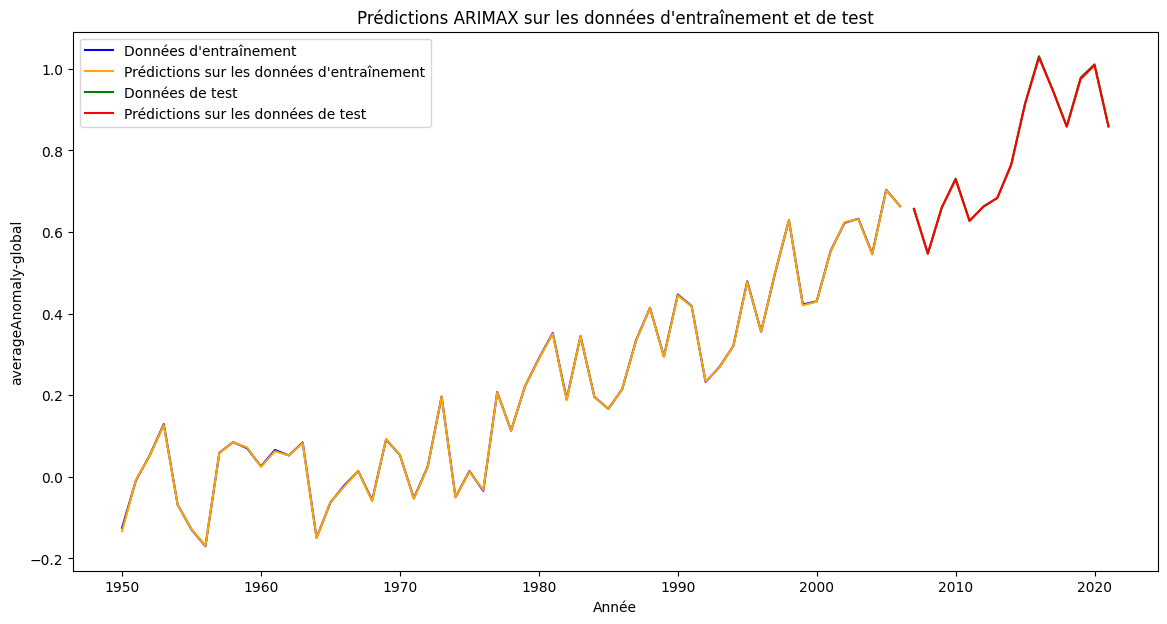

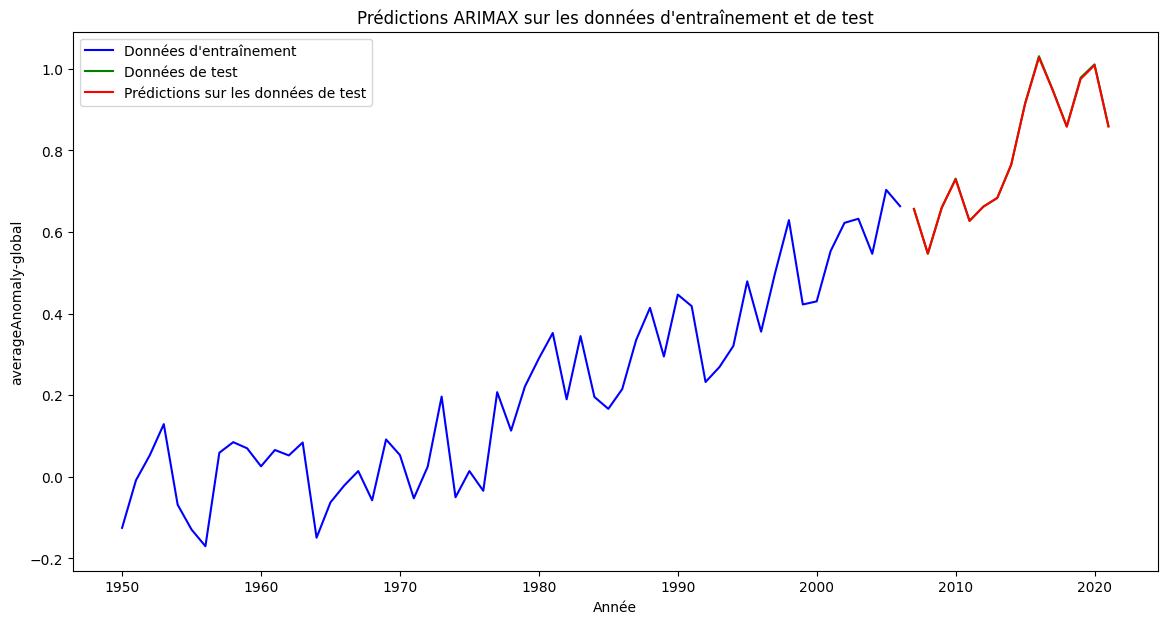

In [146]:

# Faire des prédictions sur les données d'entraînement
predictions_train = results.get_prediction(start=train.index[0], end=train.index[-1], exog=exog_train)
mse_train = mean_squared_error(endog_train, predictions_train.predicted_mean)
print(f"MSE sur les données d'entraînement : {mse_train}")

# Afficher les prédictions sur les données d'entraînement
plt.figure(figsize=(14, 7))
plt.plot(train.index, endog_train, label='Données d\'entraînement', color='blue')
plt.plot(predictions_train.predicted_mean.index, predictions_train.predicted_mean, label='Prédictions sur les données d\'entraînement', color='orange')

# Afficher les prédictions sur les données de test
plt.plot(test.index, endog_test, label='Données de test', color='green')
plt.plot(predictions_test.predicted_mean.index, predictions_test.predicted_mean, label='Prédictions sur les données de test', color='red')

plt.title('Prédictions ARIMAX sur les données d\'entraînement et de test')
plt.xlabel('Année')
plt.ylabel('averageAnomaly-global')
plt.legend()
plt.show()


plt.figure(figsize=(14, 7))
plt.plot(train.index, endog_train, label='Données d\'entraînement', color='blue')
plt.plot(test.index, endog_test, label='Données de test', color='green')
plt.plot(predictions_test.predicted_mean.index, predictions_test.predicted_mean, label='Prédictions sur les données de test', color='red')
plt.title('Prédictions ARIMAX sur les données d\'entraînement et de test')
plt.xlabel('Année')
plt.ylabel('averageAnomaly-global')
plt.legend()
plt.show()

In [233]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Créer une instance de TimeSeriesSplit avec le nombre de splits souhaité
tscv = TimeSeriesSplit(n_splits=10)

# Initialiser une liste pour stocker les résultats de la validation croisée
mse_scores = []

# Diviser les données en ensembles d'entraînement et de test en utilisant la validation croisée
for train_index, test_index in tscv.split(merged_df):
    train, test = merged_df.iloc[train_index], merged_df.iloc[test_index]

    # Définir les variables dépendantes et indépendantes pour l'entraînement
    endog_train = train['averageAnomaly-global']
    exog_train = train[['averageAnomaly-ocean', 'averageAnomaly-land', 'log-rural-population', 'log-urban-population', 'log-total-population']]
    exog_train = sm.add_constant(exog_train)

    # Créer et ajuster le modèle ARIMAX
    order = (1, 1, 1)  
    model = sm.tsa.ARIMA(endog_train, exog=exog_train, order=order)
    results = model.fit()

    # Faire des prédictions sur les données de test
    endog_test = test['averageAnomaly-global']
    exog_test = test[['averageAnomaly-ocean', 'averageAnomaly-land', 'log-rural-population', 'log-urban-population', 'log-total-population']]
    exog_test = sm.add_constant(exog_test)
    predictions_test = results.get_forecast(steps=len(test), exog=exog_test)

    # Calculer le MSE et le stocker
    mse_test = mean_squared_error(endog_test, predictions_test.predicted_mean)
    mse_scores.append(mse_test)

# Afficher les MSE pour chaque itération de la validation croisée
for i, mse in enumerate(mse_scores):
    print(f"MSE pour la validation croisée {i + 1}: {mse}")

# Afficher la moyenne des MSE
print(f"Moyenne des MSE : {np.mean(mse_scores)}")


MSE pour la validation croisée 1: 2.4701313764352248e-06
MSE pour la validation croisée 2: 3.0308798790034885e-06
MSE pour la validation croisée 3: 8.074694579963697e-06
MSE pour la validation croisée 4: 5.908049263741429e-07
MSE pour la validation croisée 5: 8.974095967170234e-07
MSE pour la validation croisée 6: 1.3162633692646019e-06
MSE pour la validation croisée 7: 1.3363098502151137e-06
MSE pour la validation croisée 8: 9.658294297167288e-07
MSE pour la validation croisée 9: 2.3479028473180683e-06
MSE pour la validation croisée 10: 6.755843596345773e-06
Moyenne des MSE : 2.7786069451353864e-06


In [147]:
import itertools

# Paramètres possibles
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

# Liste pour stocker les résultats
mse_results = []

# Séparation des données en ensembles d'entraînement et de test
train_size = int(len(merged_df) * 0.8)
train, test = merged_df.iloc[:train_size], merged_df.iloc[train_size:]

# Définir les variables dépendantes et indépendantes pour l'entraînement
endog_train = train['averageAnomaly-global']
exog_train = train[['averageAnomaly-ocean', 'averageAnomaly-land', 'log-rural-population', 'log-urban-population', 'log-total-population']]
exog_train = sm.add_constant(exog_train)

# Boucle sur les paramètres
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # Créer et ajuster le modèle ARIMAX
        model = sm.tsa.ARIMA(endog_train, exog=exog_train, order=(p, d, q))
        results = model.fit()

        # Faire des prédictions sur les données de test
        endog_test = test['averageAnomaly-global']
        exog_test = test[['averageAnomaly-ocean', 'averageAnomaly-land', 'log-rural-population', 'log-urban-population', 'log-total-population']]
        exog_test = sm.add_constant(exog_test)
        predictions_test = results.get_forecast(steps=len(test), exog=exog_test)

        # Calculer l'erreur quadratique moyenne (MSE) sur les données de test
        mse_test = mean_squared_error(endog_test, predictions_test.predicted_mean)

        # Stocker les résultats
        mse_results.append((p, d, q, mse_test))

    except:
        # Ignorer les erreurs (certains paramètres peuvent ne pas converger)
        pass

# Trouver les meilleurs paramètres
best_params = min(mse_results, key=lambda x: x[3])
print(f"Meilleurs paramètres (p, d, q) : {best_params}")

Meilleurs paramètres (p, d, q) : (2, 2, 2, 1.1515026205493175e-06)


In [207]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Séparation des données en ensembles d'entraînement et de test
train_size = int(len(merged_df) * 0.8)
train, test = merged_df.iloc[:train_size], merged_df.iloc[train_size:]

# Définir les variables dépendantes et indépendantes pour l'entraînement
endog_train = train['averageAnomaly-global']
exog_train = train[['averageAnomaly-ocean', 'averageAnomaly-land', 'log-rural-population', 'log-urban-population', 'log-total-population']]
exog_train = sm.add_constant(exog_train)

# Créer et ajuster le modèle ARIMAX
order = (1, 1, 1)  # À ajuster selon votre choix
model = sm.tsa.ARIMA(endog_train, exog=exog_train, order=order)
results = model.fit()

# Faire des prédictions sur les données de test
endog_test = test['averageAnomaly-global']
exog_test = test[['averageAnomaly-ocean', 'averageAnomaly-land', 'log-rural-population', 'log-urban-population', 'log-total-population']]
exog_test = sm.add_constant(exog_test)
predictions_test = results.get_forecast(steps=len(test), exog=exog_test)

# Comparer les prédictions avec les données réelles
mse_test = mean_squared_error(endog_test, predictions_test.predicted_mean)
print(f"MSE sur les données de test : {mse_test}")


MSE sur les données de test : 2.5935657297438924e-06


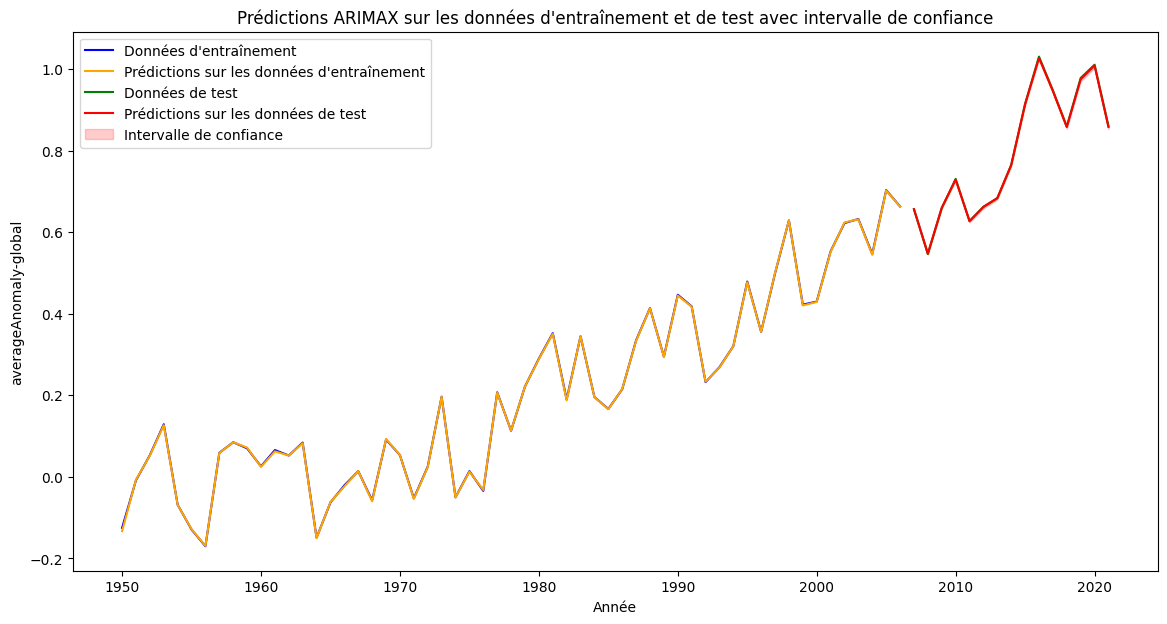

In [208]:
forecast_test = results.get_forecast(steps=len(test), exog=exog_test)
ci = forecast_test.conf_int()

# Afficher les prédictions sur les données d'entraînement
plt.figure(figsize=(14, 7))
plt.plot(train.index, endog_train, label='Données d\'entraînement', color='blue')
plt.plot(predictions_train.predicted_mean.index, predictions_train.predicted_mean, label='Prédictions sur les données d\'entraînement', color='orange')

# Afficher les données de test et les prédictions avec l'intervalle de confiance
plt.plot(test.index, endog_test, label='Données de test', color='green')
plt.plot(forecast_test.predicted_mean.index, forecast_test.predicted_mean, label='Prédictions sur les données de test', color='red')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='red', alpha=0.2, label='Intervalle de confiance')

plt.title('Prédictions ARIMAX sur les données d\'entraînement et de test avec intervalle de confiance')
plt.xlabel('Année')
plt.ylabel('averageAnomaly-global')
plt.legend()
plt.show()

Prédictions de test:
2007-01-01    0.656459
2008-01-01    0.547497
2009-01-01    0.660375
2010-01-01    0.728928
2011-01-01    0.627219
2012-01-01    0.661958
2013-01-01    0.683855
2014-01-01    0.764990
2015-01-01    0.914059
2016-01-01    1.027537
2017-01-01    0.946303
2018-01-01    0.858062
2019-01-01    0.975015
2020-01-01    1.008801
2021-01-01    0.858299
Freq: AS-JAN, Name: predicted_mean, dtype: float64

Valeurs réelles:
Year
2007-01-01    0.656667
2008-01-01    0.546667
2009-01-01    0.659167
2010-01-01    0.730833
2011-01-01    0.627500
2012-01-01    0.662500
2013-01-01    0.683333
2014-01-01    0.765000
2015-01-01    0.915000
2016-01-01    1.030833
2017-01-01    0.947500
2018-01-01    0.859167
2019-01-01    0.978333
2020-01-01    1.010833
2021-01-01    0.860000
Name: averageAnomaly-global, dtype: float64

Intervalle de confiance:
            lower averageAnomaly-global  upper averageAnomaly-global
2007-01-01                     0.653995                     0.658923
2008-01

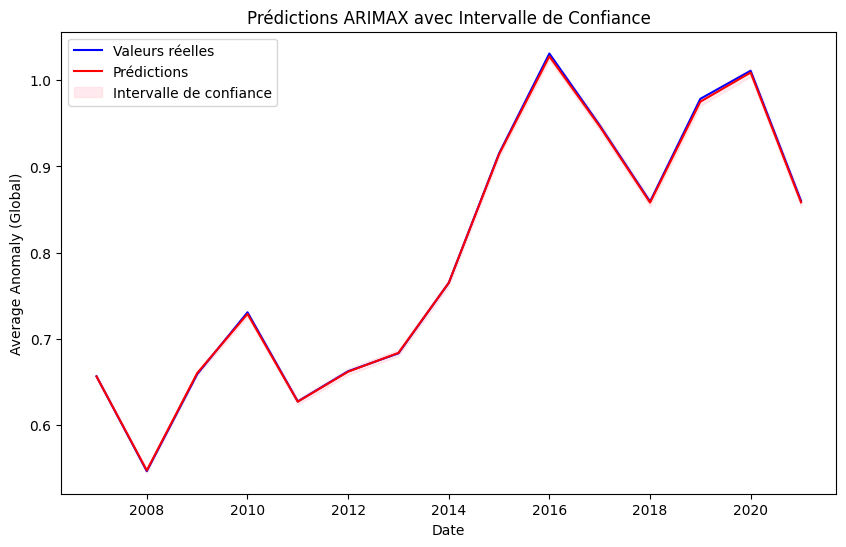

In [232]:
# Afficher les prédictions de test
print("Prédictions de test:")
print(predictions_test.predicted_mean)

# Afficher les valeurs réelles
print("\nValeurs réelles:")
print(endog_test)

# Afficher l'intervalle de confiance associé
ci = predictions_test.conf_int()
print("\nIntervalle de confiance:")
print(ci)

# Plot des prédictions et des valeurs réelles avec l'intervalle de confiance
plt.figure(figsize=(10, 6))

# Plot des valeurs réelles
plt.plot(endog_test.index, endog_test, label='Valeurs réelles', color='blue')

# Plot des prédictions
plt.plot(predictions_test.predicted_mean.index, predictions_test.predicted_mean, label='Prédictions', color='red')

# Remplir l'intervalle de confiance
plt.fill_between(predictions_test.predicted_mean.index, ci.iloc[:, 0], ci.iloc[:, 1], color='pink', alpha=0.3, label='Intervalle de confiance')

plt.title('Prédictions ARIMAX avec Intervalle de Confiance')
plt.xlabel('Date')
plt.ylabel('Average Anomaly (Global)')
plt.legend()
plt.show()


## C. Deep learning : modèle RNN